# CS109B Final Project: Machine Learning for Medical Diagnosis #
Group members: **Andrey Esipov, Ramzi Farchoukh, Nitesh Kumar, Krishna Sunkara**

 <center><img src="https://www.futuretimeline.net/blog/images/1466-chest-xray-ai-technology.jpg"></center>



## Project Statement

Artificial Intelligence with Deep Learning has immense potential to improve medical diagnosis, prognosis and treatment selection, and it can impact many fields in medicine including radiology and histopathology. In the past, AI with Deep Learning has enabled numerous applications, such as disease classification on chest X-ray images, tumor segmentation on MRI images, cancer subtype prediction on microscopic whole slide images, and beyond. AI can play a pivotal role in improving patient care and outcome.

The goal of our project is to apply machine learning techniques, namely convolutional neural networks using transfer learning, to images of patients’ chest X-ray to detect a presence of one of the 14 pathologies/deseases, like Cardiomegaly, Edema, and Infiltration.

## Dataset

The project uses a dataset that comprises chest X-ray images. The dataset contains 112,120 X-ray images of 30,805 unique patients. Each image in the data set contains multiple labels identifying 14 different pathological conditions. These in turn can be used by physicians to diagnose 8 different diseases. 



## Overview of pathologies in our dataset 
​
​We did additional research around each of the 14 pathologies found in the dataset to understand their causes and where they usually can be detected in chest X-rays.
 
 1. Atelectasis :  This can appear on partial or entire lung or area of(lobe) of the lung and can be seen on chest x-ray.
 
 2. Cardiomegaly : Cardiomegaly appears as an enlarged heart or a heart that is bigger than  normal on chest x-ray.
 
 3. Consolidation : This shows up in the areas of the lung with alveoli and small airways filled with dense material on chest x-rays.
 
 4. Edema : Pulmonary Edema is caused by excess fluid in the lung. It appears in the region of air sacs of lungs on chest x-rays.
 
 5. Effusion : Pleural Effusion is build-up of fluids in the region between lung and chest. In chest x-ray it can appear in the lower areas of the x-rays on both sides.
 
 6. Emphysema : Emphysema is caused by damage to the walls of the air sacs(alveoli) of the lung. These are located deep in the lung. 
 
 7. 'Fibrosis' : These can appear as scars on the tissues of lungs and can be seen on chest x-rays. 

 8. 'Hernia' : This is a condition which causes abnormal protrusion.  They can appear in cervical, intercostal or diaphgram region of chest x-rays. 
 
 9. Infiltration : Pulmonary Infiltration refers to abnormal substances that accumulate within cells or tissue of lungs. These can be seen in interstitium or alveoli of lung on chest x-ray.
 
 10. Mass : These appear on chest x-rays as white grey mass and can be due to presence of tumors. Chest x-rays cannot give us a definitive diagnosis of presence of cancer.
 
 11. Nodule : These are abnormal growths in the lungs. These look like shadow or spot on the lung on chest x-ray.
 
 12. Pleural thickening : Is a condition that causes thickening of the lung lining. Pleural thickening can be seen on the apex of the lungs on chest x-rays.
 
 13. Pneumonia : Pneumonia causes inflammation in the lungs  due to infection. On chest x-rays they are typically seen on different parts of the lungs.
 
 14. Pneumothorax : May be caused by chest injury or damage from lung disease.

##Modeling Approach

Below is a high-level overview of the approach that we followed when building the model to solve the problem of detecting/predicting pathologies/diseases in the X-ray images.



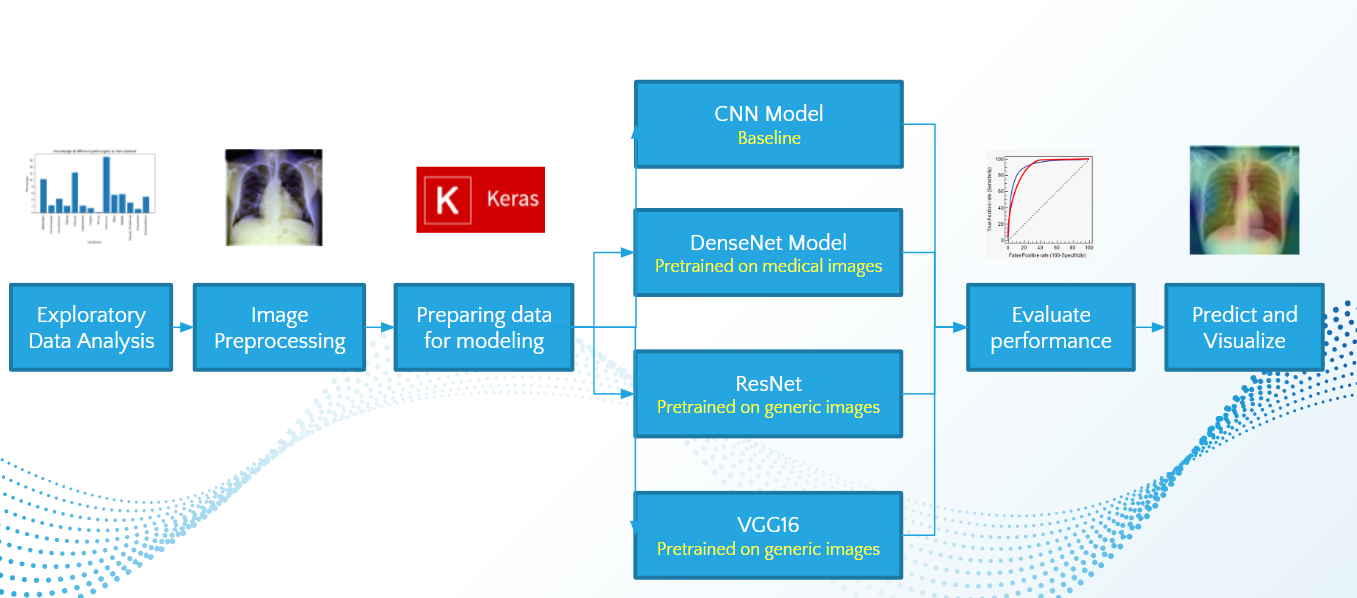


1. Read X-ray images from disk in batches, normalize and augment the images

2. Implement a custom weighted loss function to offset class imbalance that is present in the dataset (negatives outweigh positives)

3. Implement several model architectures and evaluate the performance of each of the models based AUC score (Area Under the Curve) and compare them with industry models' performance. Specifically, we built a CNN from scratch and used it as a baseline model, and then aimed to improve on it by utilizing transfer learning techniques by leveraging a pre-trained neural network - DenseNet121.

4. Use the best-performing model to detect a presence of pathology in a sample Xray image and apply GradCam to visualize class activation maps to understand why a model made a specific prediction.


## Using the Model

With the models trained, we then fed 256 x 256 X-Ray images into the best-performing model to get the predicted probabilities of each of the 14 pathologies ocurring in the X-ray.



We then used GradCam heatmap to highlight the areas of the image that the model decided to be as the most informative when making the prediction

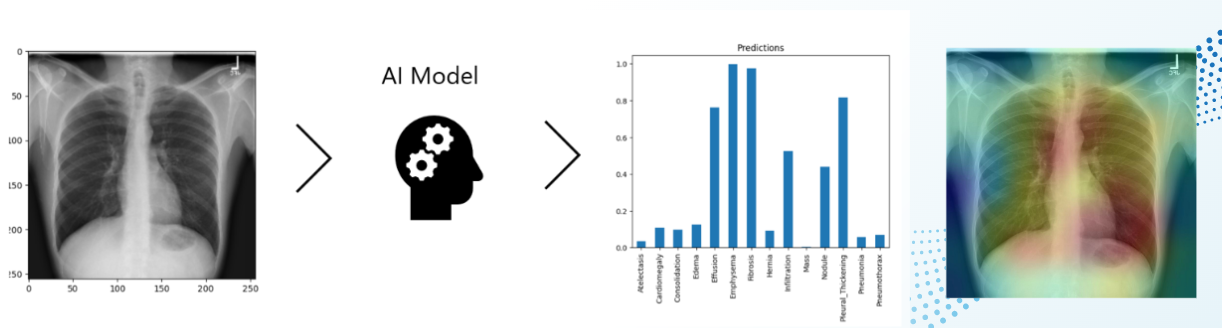

# Loading packages and data



In [1]:
!pip install scikit-multilearn

     |████████████████████████████████| 89 kB 7.6 MB/s 


In [2]:
# import libraries
import os
import skimage.io
import time
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from itertools import chain
from tqdm import tqdm
from glob import glo
from skmultilearn.model_selection import iterative_train_test_split
from scipy import sparse
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import roc_auc_score, roc_curve, auc
import skimage 
from skimage import data
from skimage.filters.rank import equalize, threshold
import skimage.feature as feature
import skimage.filters as skfilters
from skimage import exposure
from skimage.morphology import disk, square
from skimage.color import rgb2gray
from skimage.measure import block_reduce
from skimage.transform import resize
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, Dense, Dropout 
from tensorflow.keras.layers import Flatten, Input, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
import matplotlib.image as img
from tensorflow.keras import layers
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Model,Sequential
from keras.applications.mobilenet import MobileNet
from keras.applications.densenet import DenseNet121
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.utils.vis_utils import plot_model
from tensorflow.keras import backend as K
from keras.models import load_model
import matplotlib.cm as cm
from tensorflow import keras
from IPython.display import Image, display

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
print("tensorflow version", tf.__version__)
print("keras version", tf.keras.__version__)
print("Eager Execution Enabled:", tf.executing_eagerly())

# Get the number of replicas 
strategy = tf.distribute.MirroredStrategy()
print("Number of replicas:", strategy.num_replicas_in_sync)

devices = tf.config.experimental.get_visible_devices()
print("Devices:", devices)
print(tf.config.experimental.list_logical_devices('GPU'))

print("GPU Available: ", tf.config.list_physical_devices('GPU'))
print("All Physical Devices", tf.config.list_physical_devices())

# Better performance with the tf.data API
# Reference: https://www.tensorflow.org/guide/data_performance
AUTOTUNE = tf.data.experimental.AUTOTUNE

tensorflow version 2.8.0
keras version 2.8.0
Eager Execution Enabled: True
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of replicas: 1
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:GPU:0', device_type='GPU')]
GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
All Physical Devices [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
!nvidia-smi

Sat May  7 18:20:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    33W / 250W |    377MiB / 16280MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Load and Clean the Dataset ###
To start of we need to load the dataset. The dataset that we will be working with comprises of 112,120 chest X-ray images (in .png format) that come in various sizes/dimensions (2500x2048, 2992x2991, 3056x2544, 2048x2500, 2021x2021, etc.) that take up ~45GB of disk space.

In [6]:
# load and examine information about xray images
try:
    #xrays_df = pd.read_csv('../input/dataset/Data_Entry_2017_v2020.csv')
    xrays_df = pd.read_csv('/content/drive/MyDrive/CS109B_final_project/Data_Entry_2017_v2020.csv')
except:
    xrays_df = pd.read_csv('../input/data-entry-2017-v2020csv/Data_Entry_2017_v2020.csv')
xrays_df.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_001.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           57              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           80              M            PA                 2500     2048   
4           74              F            PA                 2500     2048   

   OriginalImagePixelSpacing[x     y]  
0                        0.143  0.143  
1                        0.143  0.143  
2                        0.168  0.168  
3                        0.171  0.171  
4                        0.168  0.168

We can see that the dataset contains a lot of information about a given Xray, including detected pathology(s) found in an image, whether it was a follow-up to a previous visit, ID, gender, and age of the patient, as all as Xray image dimensions.

In [7]:
# rename columns to friendlier names
xrays_df.rename(columns = {'OriginalImage[Width':'Original Image Width', 
                           'Height]':'Original Image Height',
                          'OriginalImagePixelSpacing[x':'Original Image Pixel Spacing X',
                           'y]': 'Original Image Pixel Spacing Y'}, inplace = True)

In [8]:
# examine data types
print(xrays_df.info())

# examine distribution of data in each column
xrays_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Image Index                     112120 non-null  object 
 1   Finding Labels                  112120 non-null  object 
 2   Follow-up #                     112120 non-null  int64  
 3   Patient ID                      112120 non-null  int64  
 4   Patient Age                     112120 non-null  int64  
 5   Patient Gender                  112120 non-null  object 
 6   View Position                   112120 non-null  object 
 7   Original Image Width            112120 non-null  int64  
 8   Original Image Height           112120 non-null  int64  
 9   Original Image Pixel Spacing X  112120 non-null  float64
 10  Original Image Pixel Spacing Y  112120 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 9.4+ MB
None


Follow-up #     Patient ID    Patient Age  Original Image Width  \
count  112120.000000  112120.000000  112120.000000         112120.000000   
mean        8.573751   14346.381743      46.626365           2646.078844   
std        15.406320    8403.876972      16.602680            341.246429   
min         0.000000       1.000000       0.000000           1143.000000   
25%         0.000000    7310.750000      34.000000           2500.000000   
50%         3.000000   13993.000000      49.000000           2518.000000   
75%        10.000000   20673.000000      59.000000           2992.000000   
max       183.000000   30805.000000      95.000000           3827.000000   

       Original Image Height  Original Image Pixel Spacing X  \
count          112120.000000                   112120.000000   
mean             2486.438842                        0.155649   
std               401.268227                        0.016174   
min               966.000000                        0.115000   
25%              2048.000000                        0.143000   
50%              2544.000000                        0.143000   
75%              2991.000000                        0.168000   
max              4715.000000                        0.198800   

       Original Image Pixel Spacing Y  
count                   112120.000000  
mean                         0.155649  
std                          0.016174  
min                          0.115000  
25%                          0.143000  
50%                          0.143000  
75%                          0.168000  
max                          0.198800

Looks like the mean patient age is ~47 years old, and the oldest person in the dataset is 95 years old. It also appears that one given patient had 183 follow-up Xray images taken, which seems like an extremely high number. 

In [9]:
# check for nulls
xrays_df.isnull().sum()

Image Index                       0
Finding Labels                    0
Follow-up #                       0
Patient ID                        0
Patient Age                       0
Patient Gender                    0
View Position                     0
Original Image Width              0
Original Image Height             0
Original Image Pixel Spacing X    0
Original Image Pixel Spacing Y    0
dtype: int64

Both `Image Index` and `Finding Labels` do not have any missing values. Since we will be using only these two features for this classifcation task, we do not have to handle missing values.

### Exploratory Data Analysis ###
We'll now take a deeper look at out dataset to try to uncover any insights that might inform how we should approach modeling or any additional preprocessing steps that we'll need to take

No Finding                                                         60361
Infiltration                                                        9547
Atelectasis                                                         4215
Effusion                                                            3955
Nodule                                                              2705
                                                                   ...  
Atelectasis|Consolidation|Edema|Effusion|Infiltration|Pneumonia        1
Atelectasis|Consolidation|Effusion|Emphysema|Mass|Pneumothorax         1
Cardiomegaly|Effusion|Pleural_Thickening|Pneumothorax                  1
Edema|Infiltration|Pneumothorax                                        1
Atelectasis|Consolidation|Mass|Pleural_Thickening|Pneumothorax         1
Name: Finding Labels, Length: 836, dtype: int64


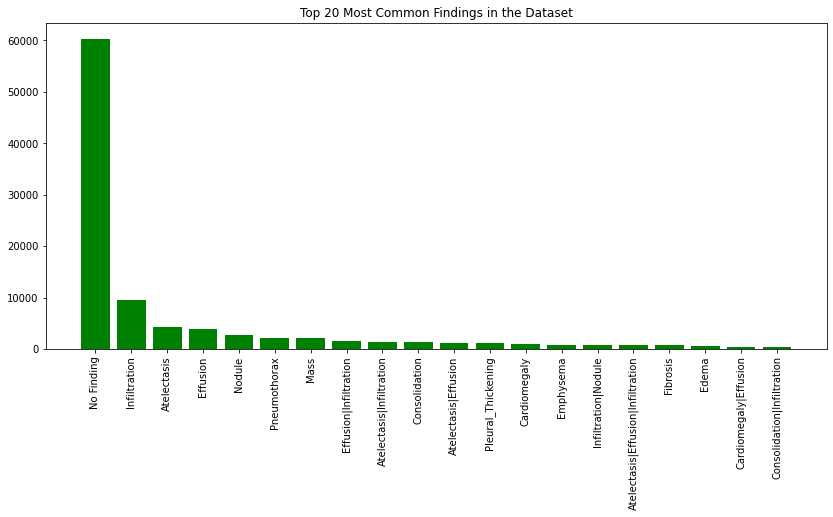

In [10]:
# examine and plot distribution of most common findings/labels
print(xrays_df['Finding Labels'].value_counts())
findings_counts = xrays_df['Finding Labels'].value_counts()[:20]

fig, ax1 = plt.subplots(1,1,figsize = (14, 6))
ax1.bar(np.arange(len(findings_counts)), findings_counts, color='g')
ax1.set_xticks(np.arange(len(findings_counts)))
ax1.set_title("Top 20 Most Common Findings in the Dataset")
_ = ax1.set_xticklabels(findings_counts.index, rotation = 90)

It appears that Finding Labels column contains entries with multiple pathologies. It is best to one-hot encode this column by splitting it into separate columns (one for each desase) with 1 indicating that this desease was found, and 0, if not.

We can also see that the vast majority of Xray images did not have any pathology findings in them. Something that we'll need to keep in mind when designing our predictive models.

In [11]:
# get list of unique deseases in the dataset
deseases = np.unique(list(chain(*xrays_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
print("Unique deseases/labels found in the dataset: ", deseases)

#create separate columns for each decease
for desease in deseases:
    xrays_df[desease] = xrays_df['Finding Labels'].apply(lambda x: 1 if desease in x else 0)

# store columns corresponding to desease labels
xrays_df.drop(['No Finding'], axis = 1, inplace = True)
desease_labels = xrays_df.columns[11:]

xrays_df.head()

Unique deseases/labels found in the dataset:  ['Atelectasis' 'Cardiomegaly' 'Consolidation' 'Edema' 'Effusion'
 'Emphysema' 'Fibrosis' 'Hernia' 'Infiltration' 'Mass' 'No Finding'
 'Nodule' 'Pleural_Thickening' 'Pneumonia' 'Pneumothorax']


Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_001.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  Original Image Width  \
0           57              M            PA                  2682   
1           58              M            PA                  2894   
2           58              M            PA                  2500   
3           80              M            PA                  2500   
4           74              F            PA                  2500   

   Original Image Height  Original Image Pixel Spacing X  ...  Effusion  \
0                   2749                           0.143  ...         0   
1                   2729                           0.143  ...         0   
2                   2048                           0.168  ...         1   
3                   2048                           0.171  ...         0   
4                   2048                           0.168  ...         0   

   Emphysema  Fibrosis  Hernia  Infiltration  Mass  Nodule  \
0          0         0       0             0     0       0   
1          1         0       0             0     0       0   
2          0         0       0             0     0       0   
3          0         0       0             0     0       0   
4          0         0       1             0     0       0   

   Pleural_Thickening  Pneumonia  Pneumothorax  
0                   0          0             0  
1                   0          0             0  
2                   0          0             0  
3                   0          0             0  
4                   0          0             0  

[5 rows x 25 columns]

In, total, we have **14 unique pathologies** that have been identified in the Xray images in our dataset, which are **Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion','Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'**

In [12]:
print(desease_labels)
print("# of Unique desease labels: ", len(desease_labels))

Index(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
       'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule',
       'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'],
      dtype='object')
# of Unique desease labels:  14


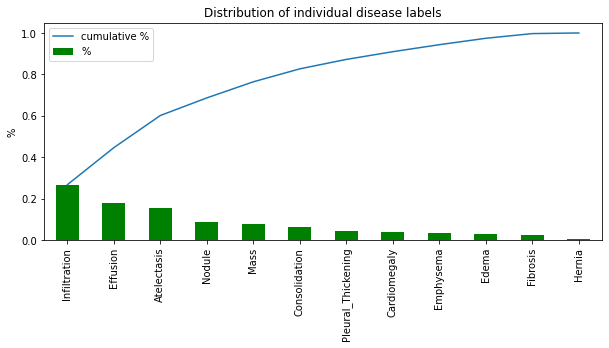

In [13]:
# distribution of individual disease labels
pdf_label_dist = (xrays_df.iloc[:,11:-2]
 .apply(sum).sort_values(ascending=False)
 .to_frame()
 .apply(lambda df: df/df.sum())
 .rename(columns={0:'pct'})
 .assign(cum_pct=lambda df: df.cumsum())
)
ax = pdf_label_dist.plot.bar(y='pct', label='%', color='g', ylabel='%', title='Distribution of individual disease labels', figsize=(10,4))
ax.plot(pdf_label_dist['cum_pct'], label='cumulative %')
ax.legend();

We can also see that **Infiltration, Effusion and Atelectasis** are the Top 3 most common pathologies detected in the Xray images in our dataset. 

In [14]:
pdf_label_dist.T.style.format('{:.3f}')

Let's now take a deeper look at Patients

In [15]:
# examine how many unique patiets are there in the dataset
print("Number of unique patients in the dataset: ", xrays_df['Patient ID'].nunique())

Number of unique patients in the dataset:  30805


There are **30,805 unique patients in the dataset, but we have 112,120 xray images**. This means that some patients have multiple xrays taken. We will need to account for this when we split the data into train, validation, and test sets to make sure that there is no data leakage (xray images from the same patient appearing in different data sets (i.e. train,val,test))

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


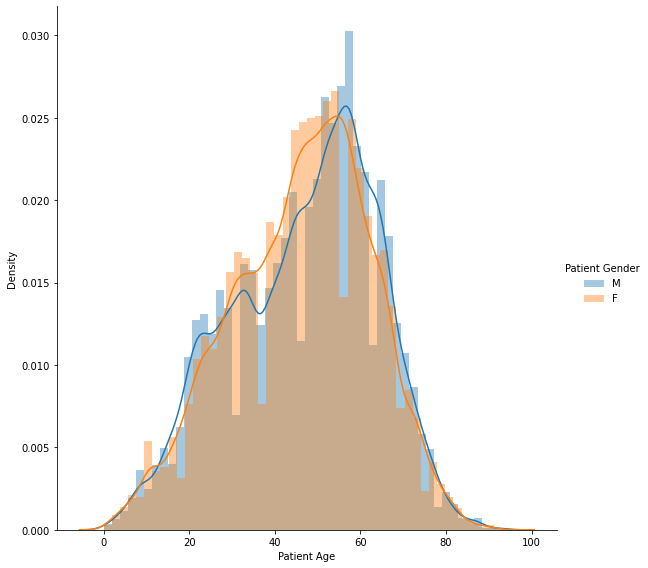

In [16]:
# look at distribution of ages by gender
sns.FacetGrid(xrays_df,hue='Patient Gender',size=8).map(sns.distplot,'Patient Age').add_legend()
plt.show()

It appears that age distributions across genders are very similar.

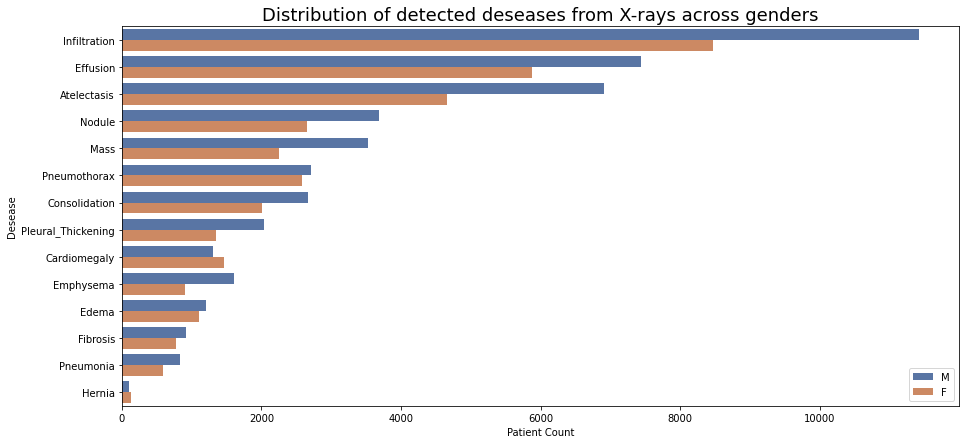

In [17]:
# examine disease distribution by gender
plt.figure(figsize=(15,8))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
data = pd.melt(xrays_df, id_vars=['Patient Gender'], value_vars = desease_labels, var_name = 'Desease', value_name = 'Count')
data = data.loc[data.Count>0]

# display plot
g = sns.countplot(y ='Desease',hue = 'Patient Gender', palette ='deep', data=data, ax=ax1, order = data['Desease'].value_counts().index)
ax1.set(ylabel = "Desease", xlabel = "Patient Count")
ax1.legend()
ax1.set_title('Distribution of detected deseases from X-rays across genders',fontsize=18);

It appears for almost every desease, there are more detected cases for men vs. women, with the exception of Cardiomegaly.

In [18]:
# examine image information in the dataset
print("Total number of X-ray images in the dataset: ", len(xrays_df['Image Index']))
print("\nX-ray image dimensions in the dataset:")

image_dimensions = xrays_df[['Original Image Width','Original Image Height']]
image_dimensions.value_counts()

Total number of X-ray images in the dataset:  112120

X-ray image dimensions in the dataset:


Original Image Width  Original Image Height
2500                  2048                     37153
2992                  2991                     21961
3056                  2544                     15340
2048                  2500                      8683
2021                  2021                      4411
                                               ...  
2536                  2772                         1
                      2828                         1
                      2844                         1
                      2868                         1
3827                  3567                         1
Length: 10471, dtype: int64

It appears that the dataset contains images in different sizes (dimensions), with 2500x2048, 2992x2991, and 3056X2544 being most common. So we'll need to do some resizing as we feed the images into the predictive model.

Now, we'll add actual paths to the images on disk and store them in our dataframe

In [19]:
# get the paths to all of the X-ray images and add them to the dataframe
#image_paths = {os.path.basename(x): x for x in glob(os.path.join('..', 'input', 'data', 'images*', '*', '*.png'))}
image_paths = {os.path.basename(x): x for x in glob(os.path.join('/content/drive/MyDrive/CS109B_final_project/data_2','images*', '*', '*.png'))}
xrays_df['Image Path'] = xrays_df['Image Index'].map(image_paths.get)
xrays_df.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_001.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  Original Image Width  \
0           57              M            PA                  2682   
1           58              M            PA                  2894   
2           58              M            PA                  2500   
3           80              M            PA                  2500   
4           74              F            PA                  2500   

   Original Image Height  Original Image Pixel Spacing X  ...  Emphysema  \
0                   2749                           0.143  ...          0   
1                   2729                           0.143  ...          1   
2                   2048                           0.168  ...          0   
3                   2048                           0.171  ...          0   
4                   2048                           0.168  ...          0   

   Fibrosis  Hernia  Infiltration  Mass  Nodule  Pleural_Thickening  \
0         0       0             0     0       0                   0   
1         0       0             0     0       0                   0   
2         0       0             0     0       0                   0   
3         0       0             0     0       0                   0   
4         0       1             0     0       0                   0   

   Pneumonia  Pneumothorax                                         Image Path  
0          0             0  /content/drive/MyDrive/CS109B_final_project/da...  
1          0             0  /content/drive/MyDrive/CS109B_final_project/da...  
2          0             0  /content/drive/MyDrive/CS109B_final_project/da...  
3          0             0  /content/drive/MyDrive/CS109B_final_project/da...  
4          0             0  /content/drive/MyDrive/CS109B_final_project/da...  

[5 rows x 26 columns]

Now that we have the image paths, let's visualize what the actual Xray images look like

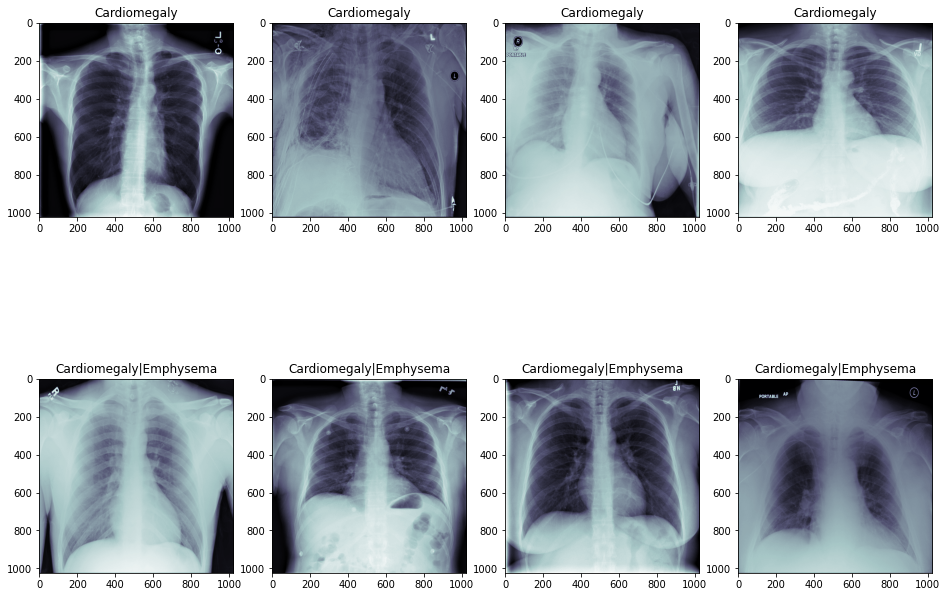

In [21]:
# display a few sample X-ray images
fig, axes = plt.subplots(2, 4, figsize=(16,12))

for i in range(2):
    for j in range(4):
        random_image = random.randint(0, len(xrays_df))
        xray_img = img.imread(xrays_df['Image Path'][random_image])
        axes[i][j].imshow(xray_img, cmap = 'bone')
        axes[i][j].set_title(xrays_df['Finding Labels'][i])

plt.show()

## Data Preprocessing ##

Before, we go into model building, there is quite a bit of data preprocessing that we'll need to do first.

We'll first take a look at the images themselves.

Contrast of an image is range between the minimum and maximum pixel values of an image. The larger the range of values the more distinctive the differences in the image will be. Looking at the image we can see that their contrast varies so one way to improve the contrast in an image is to equalize the pixel values over the maximum of the range. The goal is to find a transformation that stretches the pixel values into a uniform distribution. This process is know as histogram equalization.so will be impleting three flavor of this histogram equalization ('exposure.equalize_hist', 'exposure.equalize_adapthist',deep local equalizer )and check which one will be best for our dataset. that will give us the ideal distribution which will make the pixel values distributed over the full range of possible values. For unsigned integer values, {0,255}. Further, the distribution of pixel values should be uniform. 

Histogram equalization can be performed in a number of ways. The obvious algorithm is global histogram equalization. The pixel values are transformed to equalize the histogram across the entire image. However, if illumination is inconsistent across the image, global equalization will not be optimal. An alternative is to perform local histogram equalization over small areas of the image. This method is known as adaptive histogram equalization. Adaptive equalization can compensate for uneven illumination across the image.

Below are the function used to plot the distributions 

In [22]:
# helpers to visualize image pixel intensities and their distributions

def plot_image_distributions(img):
    '''Function plots histograms of the three color channels of the image along 
    with the cumulative distributions'''
    fig, ax = plt.subplots(2,2, figsize=(12, 12))
    ax = ax.flatten()
    titles=['Red','Green','Blue']
    for i in range(3):
        ax[i].hist(img[:,:,i].flatten(), bins=50, density=True, color=titles[i], alpha=0.3)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel('Pixel value')
        ax[i].set_ylabel('Density')
        ax[3].hist(img[:,:,i].flatten(), bins=50, density=True, cumulative=True, color=titles[i], histtype='step')
    ax[3].set_title('Cumulative distributions')  
    ax[3].set_xlabel('Pixel value')
    ax[3].set_ylabel('Cumulative density')  
    
def plot_gray_scale_distribution(img):
    '''Function plots histograms a gray scale image along 
    with the cumulative distribution'''
    fig, ax = plt.subplots(1,2, figsize=(12, 5))
    ax[0].hist(img.flatten(), bins=50, density=True, alpha=0.3)
    ax[0].set_title('Histogram of image')
    ax[0].set_xlabel('Pixel value')
    ax[0].set_ylabel('Density')
    ax[1].hist(img.flatten(), bins=50, density=True, cumulative=True, histtype='step')
    ax[1].set_title('Cumulative distribution of image')  
    ax[1].set_xlabel('Pixel value')
    ax[1].set_ylabel('Cumulative density') 
    plt.show()
    
def plot_grayscale(img):
    fig, ax = plt.subplots( figsize=(6, 6))
    _=ax.imshow(img, cmap=plt.get_cmap('gray'))
    plt.show()
    
# helper to transform and visualize image using different pixel intensity transformations
def test_equalize(img, func): 
    img_equalized = np.multiply(eval(func)(img), 255).astype(np.uint8)
    plot_grayscale(np.divide(img_equalized, 255.0))
    plot_gray_scale_distribution(np.divide(img_equalized, 255.0))    
    return img_equalized

original image


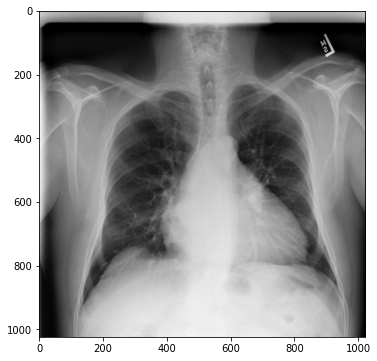

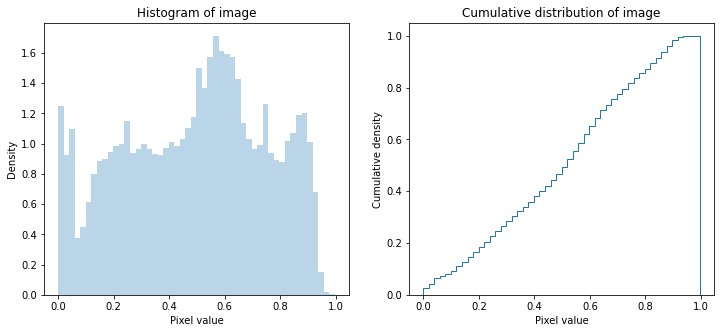

In [23]:
# taking 1st image 
xray_img = img.imread(xrays_df['Image Path'][1])
print("original image")
plot_grayscale(xray_img)
plot_gray_scale_distribution(xray_img)


 Appliying exposure.equalize_hist on the original image


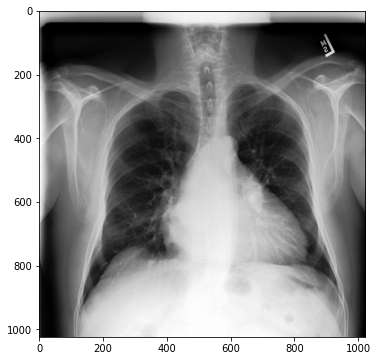

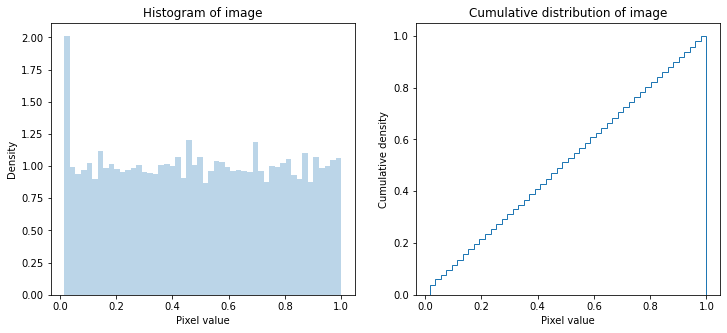


 Appliying exposure.equalize_adapthist on the original image


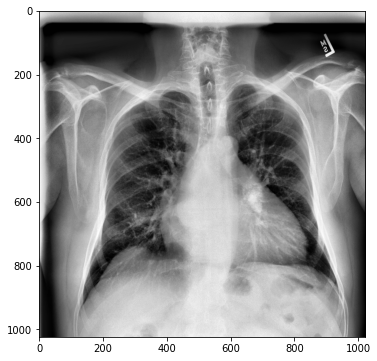

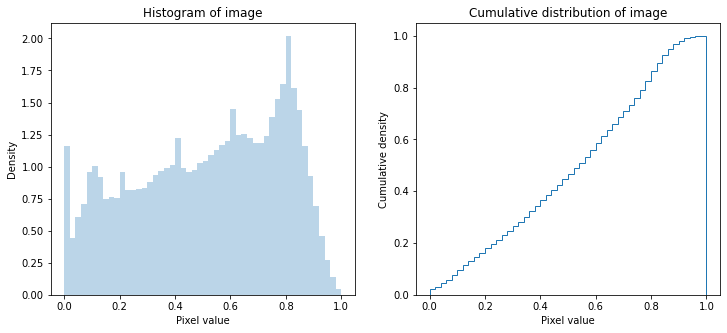

In [24]:
equalize_list = ['exposure.equalize_hist', 'exposure.equalize_adapthist']
for func in equalize_list: 
    print('\n Appliying ' + func+' on the original image')
    retina_gray_scale_equalized = test_equalize(xray_img, func)


 Equalize image using local histogram with footprint of disk(7)


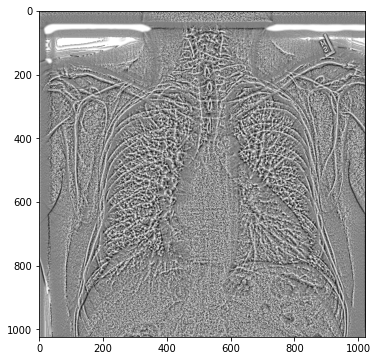

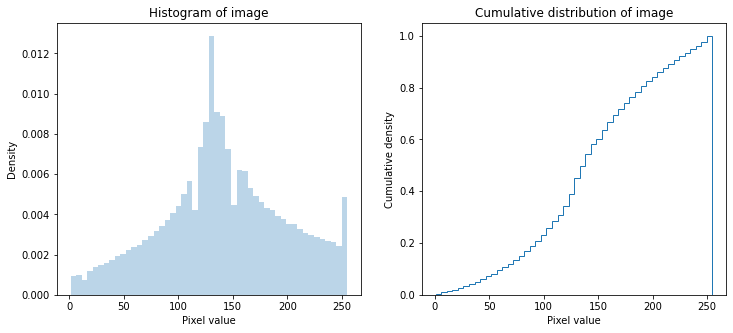

In [25]:
print('\n Equalize image using local histogram with footprint of disk(7)')
xray_img_local_equalizer = equalize(np.multiply(xray_img, 255).astype(np.uint8), disk(7))
plot_grayscale(xray_img_local_equalizer)
plot_gray_scale_distribution(xray_img_local_equalizer)

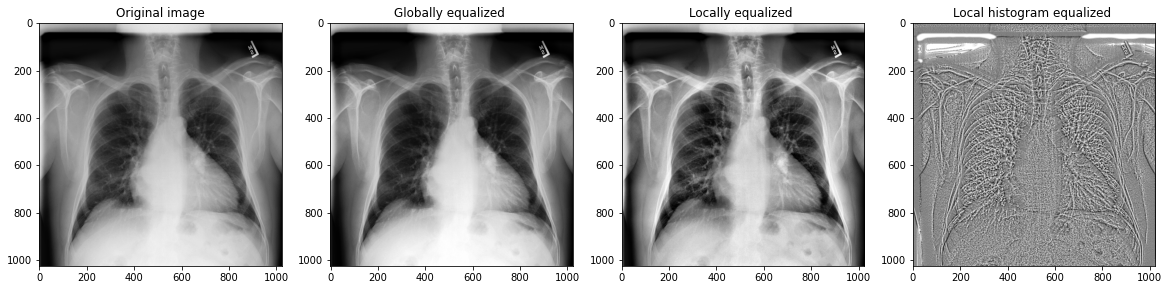

In [26]:
#equalize_list = ['exposure.equalize_hist', 'exposure.equalize_adapthist']
img=xray_img
fig, ax = plt.subplots(1,4, figsize=(20, 20))
ax[0].imshow(xray_img, cmap=plt.get_cmap('gray')) 
ax[0].set_title('Original image')
img_equalized_global = np.multiply(exposure.equalize_hist(img), 255).astype(np.uint8)
ax[1].imshow(np.divide(img_equalized_global, 255.0), cmap=plt.get_cmap('gray'))
ax[1].set_title('Globally equalized ')
img_equalized_local = np.multiply(exposure.equalize_adapthist(img), 255).astype(np.uint8)
ax[2].imshow(np.divide(img_equalized_local, 255.0), cmap=plt.get_cmap('gray')) 
ax[2].set_title('Locally equalized ')

ax[3].imshow(np.divide(xray_img_local_equalizer, 255.0), cmap=plt.get_cmap('gray')) 
ax[3].set_title("Local histogram equalized ")

plt.show()

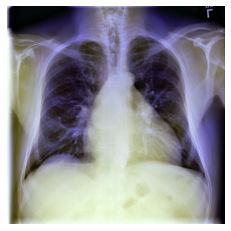

In [27]:
# stack the original single channel, and it's pixel intensity transformations

img = skimage.io.imread(xrays_df.iloc[0]['Image Path'])
plt.imshow(tf.stack([
    img,
    np.multiply(exposure.equalize_hist(img), 255).astype(np.uint8),
    np.multiply(exposure.equalize_adapthist(img), 255).astype(np.uint8)
], axis=2), cmap='viridis')
plt.axis('off');

### Image Analysis Findings 
- Looking at the three different Histogram equalization and their pixel intesity distribution we can see that more subtle features of the chest network are visible, particularly in the locally adapted equalized image.

- The distribution of the globally equalized image is closest to the uniformly distributed, with a jump in the CDF at 0.0 from the dark background. 

- The locally adapted equalized image has distribution with a wider range of values that the raw image, but not nearly uniformly distributed.

- These transformations help enhance certain image features. Therefore, they will be added as additional channels of the image for training, by stacking them with the original image gray scale channel


# Prepare data for training and dealing with data leakage

Now we will take additional steps to prepare data for model training. Specifically, making sure that split of the dataset into train, val, and test sets without any data leakage (potential data leakage problem with Patient ID that we identified earlier)

### Create train, validation and test splits ###
Create train and test sets using a groupshufflesplit module on Patient ID column to prevent data leakage. We'll use 80% of images for training and the remaining 20% split equially between test and validation sets.

In [28]:
gss = GroupShuffleSplit(n_splits=1, train_size=0.8, random_state=42)

# perform stratified sampling using Patient ID 
for train_idx, test_idx in gss.split(xrays_df, groups = xrays_df['Patient ID'].values):
    xrays_df_train = xrays_df.iloc[train_idx]
    xrays_df_test, xrays_df_val = train_test_split(xrays_df.iloc[test_idx], 
                                   test_size = 0.5, 
                                   random_state = 42)
    
print('Size of training set', xrays_df_train.shape[0])
print('Size of validation set', xrays_df_val.shape[0])  
print('Size of test set', xrays_df_test.shape[0])   

Size of training set 89826
Size of validation set 11147
Size of test set 11147


In [29]:
# display the sample sizes
(pd.DataFrame([xrays_df_train.shape[0], xrays_df_val.shape[0], xrays_df_test.shape[0]], 
             index=['train', 'validation', 'test'], 
             columns=['samples'])
 .assign(fraction=lambda df: df/df.sum())
 .style.format({'fraction': '{:.2f}'})
)

Now let's examine how well-represented are each of the pathologies/deseases in our datasets (train,val, test)

In [30]:
# display the label distribution across train, val and test sets
pd.concat([
    (xrays_df_train[desease_labels]
     .apply(sum).sort_values(ascending=False)
     .to_frame()
     .apply(lambda df: df/df.sum())
     .rename(columns={0:'train'})
    ),
    (xrays_df_val[desease_labels]
     .apply(sum).sort_values(ascending=False)
     .to_frame()
     .apply(lambda df: df/df.sum())
     .rename(columns={0:'val'})
    ),
    (xrays_df_test[desease_labels]
     .apply(sum).sort_values(ascending=False)
     .to_frame()
     .apply(lambda df: df/df.sum())
     .rename(columns={0:'test'})
    )
], axis=1).T.style.format('{:.2f}')


Looks like all the pathologies are represented across the 3 sets, this is a good indicator that our model will be able to have enough data to both train and validate/test predictions for a given desease.

In [31]:
# examine number of samples present in the datasets for each pathology/desease
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

def samples_distribution(df):
    print(f"\n The class distribution for {namestr(df, globals())} is \n")
    for column in desease_labels:
        print(f"The class {column} has {df[column].sum()} samples")

samples_distribution(xrays_df_train)
samples_distribution(xrays_df_val)
samples_distribution(xrays_df_test)


 The class distribution for ['xrays_df_train'] is 

The class Atelectasis has 9352 samples
The class Cardiomegaly has 2158 samples
The class Consolidation has 3716 samples
The class Edema has 1849 samples
The class Effusion has 10764 samples
The class Emphysema has 1985 samples
The class Fibrosis has 1322 samples
The class Hernia has 179 samples
The class Infiltration has 15797 samples
The class Mass has 4706 samples
The class Nodule has 5051 samples
The class Pleural_Thickening has 2725 samples
The class Pneumonia has 1137 samples
The class Pneumothorax has 4282 samples

 The class distribution for ['xrays_df_val'] is 

The class Atelectasis has 1097 samples
The class Cardiomegaly has 324 samples
The class Consolidation has 464 samples
The class Edema has 225 samples
The class Effusion has 1315 samples
The class Emphysema has 274 samples
The class Fibrosis has 191 samples
The class Hernia has 28 samples
The class Infiltration has 2069 samples
The class Mass has 532 samples
The class 

Finally, we'll check that our dataset splitting procedure helped address data leakage concerns

In [32]:
def check_for_leakage(df1, df2, patient_col):
    df1_patients_unique = set(df1[patient_col].values)
    df2_patients_unique = set(df2[patient_col].values)
    patients_in_both_groups = df1_patients_unique.intersection(df2_patients_unique)
    # leakage contains true if there is patient overlap, otherwise false.
    leakage = len(patients_in_both_groups)>0 
    return leakage

print("Is there any data leakage between train and test sets?: ", check_for_leakage(xrays_df_train, xrays_df_test, 'Patient ID'))
print("Is there any data leakage between train and val sets?: ", check_for_leakage(xrays_df_train, xrays_df_val, 'Patient ID'))

Is there any data leakage between train and test sets?:  False
Is there any data leakage between train and val sets?:  False


It appears that **we were able to successfully deal with data leakage problem.**

# Feeding Data to the Modeling Process ###
Now that we have created train, validation, and test sets. We will need to feed that data into our model. Given the very large size of the dataset (>45 GB), it is not going to be feasible to fit all the data into memory (RAM). As a result, we considered and implemented 2 different solutions to this:
- Using Keras's **ImageDataGenerator** class to dynamically load/feed batches of images from disk into the model
- Using **TF Records** to permanantely store pre-processed images on disk and then feed them into the model

In the end, we decided to settle on the ImageDataGenerator approach because it allowed us to iterate quicker on image pre-processing and augmentation steps since the process of TF Records creation took several hours each time a change needed to be made and the resulting size of the created TF Records files ended up rather large (>2GB). We are including the code that we used to generate TF Records as a reference for completeness.

### REFERENCE CODE: preprocessing using TFRecords  


```python
## TFRecord helpers

AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32
IMG_SIZE = 224

def create_tfrecords(df, num_rec_per_file=32, loc='./tfrecords', img_size=IMG_SIZE):

    image_path = df['Image Path'].values
    image_idx = df['Image Index'].values
    sample_weight = df['Weight'].values
    y = df['Target'].values
    num_recs = len(df)
    num_files = num_recs // num_rec_per_file
    if num_recs % num_rec_per_file:
        num_files += 1

    def _make_img_feature(img_path): 
        image = tf.io.read_file(img_path)
        image = tf.image.decode_png(image, channels=1)
        image = tf.cast(tf.squeeze(tf.image.resize(image, [img_size, img_size]), axis=2), tf.uint8).numpy()
        image = tf.stack([
            image,
            np.multiply(exposure.equalize_hist(image), 255).astype(np.uint8),
            np.multiply(exposure.equalize_adapthist(image), 255).astype(np.uint8),
        ], axis=2)
        image = tf.cast(image, tf.uint8)
        image = tf.image.encode_jpeg(image).numpy()
        return tf.train.Feature(bytes_list=tf.train.BytesList(value=[image])
    )
    _make_input_feature = lambda v: tf.train.Feature(float_list=tf.train.FloatList(value=np.array(v).flatten()))
    _make_int_feature = lambda v: tf.train.Feature(int64_list=tf.train.Int64List(value=v))
    _make_str_feature = lambda v: tf.train.Feature(bytes_list=tf.train.BytesList(value=[v.encode()]))
    
    if not os.path.exists(loc): os.makedirs(loc, exist_ok=True)

    for file_nbr in range(num_files):
        with tf.io.TFRecordWriter(loc + f"/file_{file_nbr}.tfrec") as out:
            indices = list(range(num_recs))
            for i in indices[(file_nbr * num_rec_per_file) : ((file_nbr + 1) * num_rec_per_file)]:
                feature = {
                           'image': _make_img_feature(image_path[i]), 
                           'image_idx': _make_str_feature(image_idx[i]), 
                           'target': _make_int_feature(y[i]),
                           'weight': _make_int_feature([sample_weight[i]]),
                }
                example = tf.train.Example(features=tf.train.Features(feature=feature))
                out.write(example.SerializeToString())


parse a TFRecord
def parse_tfrecord(tfrec):
    feature_spec = {
        'image': tf.io.FixedLenFeature([], tf.string),
        'image_idx': tf.io.FixedLenFeature([], tf.string),
        'target': tf.io.VarLenFeature(tf.int64),
        'weight': tf.io.FixedLenFeature([], tf.int64),
    }
    example = tf.io.parse_single_example(tfrec, feature_spec)
    img = tf.image.decode_jpeg(example['image'], channels=3)
    idx, y, weight = example['image_idx'], tf.sparse.to_dense(example['target']), example['weight']
    return idx, img, y, weight

create dataset from TFRecords store
def create_dataset(loc):
    
    return (
        tf.data.TFRecordDataset(tf.io.gfile.glob(f"{loc}/*.tfrec"))
        .shuffle(BATCH_SIZE)
        .map(parse_tfrecord, num_parallel_calls=AUTOTUNE, deterministic=False)
        .batch(BATCH_SIZE)
        .prefetch(1)
    )
```


Define image scaling and augmentation steps as layers, so that they can be directly run on GPU resize, 

```python
#rescale layers, used for all datasets
resize_and_rescale = tf.keras.Sequential([
     layers.Resizing(IMG_SIZE, IMG_SIZE, 3),
    layers.Rescaling(1./255)
])

 image augmentation, only used on training set
data_augmentation = tf.keras.Sequential([
     shear_range=0.1,
    layers.RandomZoom(0.05),
    layers.RandomRotation(0.025),
    layers.RandomTranslation(0.1, 0.1),
     layers.RandomFlip()
])
```  

 ```python
 #Apply preprocessing on the data and store as TFRecords 3
# ********** TO BE RUN ON GPU ONLY WHEN NEEDED (typically once #************ #

create_tfrecords(xrays_df_train, loc='./train')
create_tfrecords(xrays_df_val, loc='./val')
create_tfrecords(xrays_df_test, loc='./test')
```

```python
#Save the tf record  locally on disk and then uplaod to Colab if needed 3
# ********** Please click on the blue colored  "tf_record_weight.zip" once #finished and it will start the download ************ #

%cd /kaggle/working
from IPython.display import FileLink, FileLinks
from shutil import make_archive
FileLinks('.')
make_archive('tf_record_weight', 'zip', '/kaggle/working')
display(FileLink('tf_record_weight.zip'))
```

```python
load pre-processed data from TFRecords
train_gen = create_dataset('../input/tf-input/train-20220504T041703Z-001/train')
val_gen = create_dataset('../input/tf-input/val-20220504T041439Z-001/val')
test_gen = create_dataset('../input/tf-input/test-20220504T041019Z-001/test')
```

```python
#display top n 3-channel images from the training set
idx, img, y, w = next(iter(test_gen))
img = resize_and_rescale(img)
img = data_augmentation(img)
_, axes = plt.subplots(1,5, figsize=(15,4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(img[i])
    ax.axis('off')
plt.show();
```

```python
#drop the image index from TFRecords, so that data generators can be directly fed to model.fit(...)
train_generator = train_gen.map(lambda idx, img, y, weight: (data_augmentation(resize_and_rescale(img)), y, weight))
val_generator = val_gen.map(lambda idx, img, y, weight: (resize_and_rescale(img), y, weight))
test_generator = test_gen.map(lambda idx, img, y, weight: (resize_and_rescale(img), y))
```

## Preprocessing with ImageDataGenerator
The following implementation of ImageDataGenerator was borrowed and modified from Coursera's Medical AI course - https://www.coursera.org/specializations/ai-for-medicine

In [34]:
# function to process and augment images using Image Data Generator
def train_image_generator(df, image_path, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_width = 320, target_height = 320):
    
    print("Generating Train Images...")
    # normalize images
    image_generator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    
    # flow from directory with specified batch size and target image size
    generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=None,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_width,target_height))
    
    return generator

In [35]:
def test_and_val_image_generator(valid_df, test_df, train_df, image_path, x_col, y_cols, sample_size=100, batch_size=32, seed=1, target_width = 320, target_height = 320):
    
    print("Generating Test and Validation Images...")
    raw_train_generator = ImageDataGenerator().flow_from_dataframe(
        dataframe=train_df, 
        directory=None, 
        x_col=x_col, 
        y_col=y_cols, 
        class_mode="raw", 
        batch_size=sample_size, 
        shuffle=True, 
        target_size=(target_width, target_height))
    
    # get data sample
    batch = raw_train_generator.next()
    data_sample = batch[0]

    # use sample to fit mean and std for test set generator
    image_generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization= True)
    
    # fit generator to sample from training data
    image_generator.fit(data_sample)

    # get validation generator
    val_generator = image_generator.flow_from_dataframe(
            dataframe=valid_df,
            directory=image_path,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_width,target_height))
    
    # get test generator
    test_generator = image_generator.flow_from_dataframe(
            dataframe=test_df,
            directory=image_path,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_width,target_height))
    
    return val_generator, test_generator

In [36]:
# create train generator with 256x256 images
train_generator = train_image_generator(df = xrays_df_train,
                                      image_path = None, 
                                      x_col = "Image Path",
                                      y_cols = desease_labels, 
                                      batch_size= 32,
                                      target_width = 256, 
                                      target_height = 256)

# create validation and test generators with 256x256 images
val_generator, test_generator = test_and_val_image_generator(xrays_df_val, xrays_df_test, xrays_df_train,
                                      image_path = None, 
                                      x_col = "Image Path",
                                      y_cols = desease_labels,
                                      batch_size= 32,
                                      target_width = 256, 
                                      target_height = 256)

Generating Train Images...
Found 89826 validated image filenames.
Generating Test and Validation Images...
Found 89826 validated image filenames.
Found 11147 validated image filenames.
Found 11147 validated image filenames.


Now, let's also create image generators for our small dataset as well

100%|██████████| 4/4 [00:00<00:00, 91.63it/s]


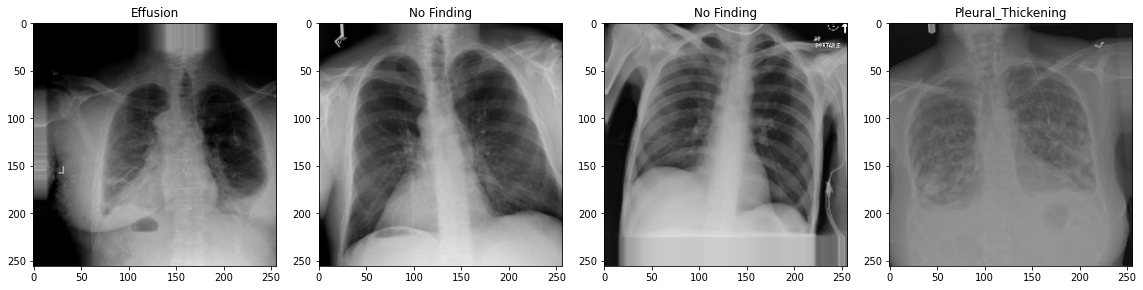

In [56]:
# function to get actual label of the image
def get_label(y):
    labels = []
    i = 0
    for idx in y:
        if idx:
            labels.append(desease_labels[i])
        i += 1
    if not labels:
        return 'No Finding'
    else:
        return '|'.join(labels)

#get batch of images from train_generator  
x, y = train_generator.__getitem__(0)

#show a few images from train image data generator
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 1
for i in tqdm(range(1, columns*rows +1)):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x[i-1], cmap = 'bone')
    plt.title(get_label(y[i-1]))
    fig.add_subplot
plt.tight_layout()

batch shape is : (32, 256, 256, 3)

 ploting 1st image of the batch AxesImage(54,36;334.8x217.44)


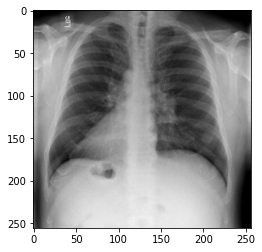

In [39]:
print("batch shape is :",x.shape)
print("\n ploting 1st image of the batch",plt.imshow(x[0,:,:,:]))

The following implementation of ImageDataGenerator was borrowed and modified from Coursera's Medical AI course - https://www.coursera.org/specializations/ai-for-medicine

## Addressing Class Imbalance: Creating a custom Weighted Loss Function ##
Now that we took care of creating image data generators that we'll feed into the model, we need to address the issue of class imbalance.

One of the challenges with working with medical diagnostic datasets is the large class imbalance present in such datasets. Let's plot the relative proportion of each of the pathologies in our dataset.

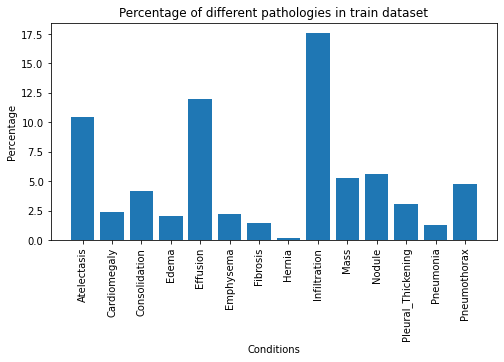

In [40]:
plt.figure(figsize=(8,4))
plt.xticks(rotation = 90)
plt.bar(desease_labels, train_generator.labels.sum(axis = 0)/train_generator.n * 100)
plt.title('Percentage of different pathologies in train dataset')
plt.xlabel('Conditions')
plt.ylabel('Percentage')
plt.show()

We can see from this plot that the prevalance of positive cases varies significantly across the different pathologies.

The Hernia pathology has the greatest imbalance with the proportion of positive training cases being about 0.2%, even Infiltration pathology, which has the least amount of imbalance, has only 17.5% of the training cases labelled positive.

We would need to train our model using an evenly balanced dataset so that the positive and negative training cases would contribute equally to the loss. Thefore, we'll use the following adjusted cross-entropy calculations to address this: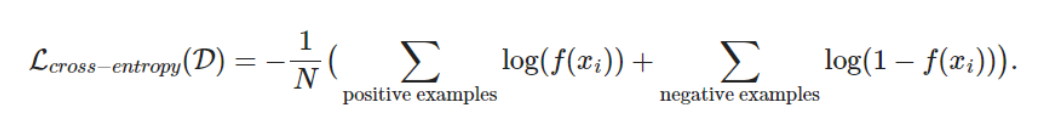

In [41]:
# calulating frequency of positive and negative classes
def compute_freq(ground_labels):
    num_samples = ground_labels.shape[0]
    pos_samples = np.sum(ground_labels,axis=0)
    neg_samples = num_samples-pos_samples
    pos_samples = pos_samples/float(num_samples)
    neg_samples = neg_samples/float(num_samples)
    return pos_samples, neg_samples

freq_pos , freq_neg = compute_freq(train_generator.labels)
print(freq_pos)
print(freq_neg)

[0.1041124  0.02402422 0.04136887 0.02058424 0.11983167 0.02209828
 0.01471734 0.00199274 0.17586222 0.05239018 0.05623094 0.03033643
 0.01265781 0.04766994]
[0.8958876  0.97597578 0.95863113 0.97941576 0.88016833 0.97790172
 0.98528266 0.99800726 0.82413778 0.94760982 0.94376906 0.96966357
 0.98734219 0.95233006]


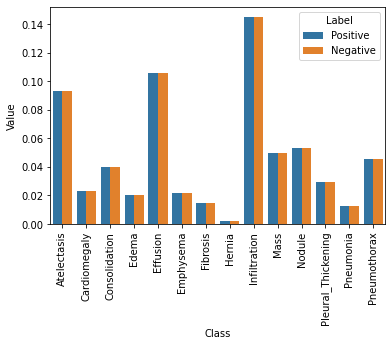

In [42]:
pos_weights = freq_neg
neg_weights = freq_pos
pos_contribution = freq_pos * pos_weights 
neg_contribution = freq_neg * neg_weights
pos_weights

data = pd.DataFrame({"Class": desease_labels, "Label": "Positive", "Value": pos_contribution})
data = data.append([{"Class": desease_labels[l], "Label": "Negative", "Value": v} 
                        for l,v in enumerate(neg_contribution)], ignore_index=True)
plt.xticks(rotation=90)
sns.barplot(x="Class", y="Value", hue="Label", data=data);

Define our weighted_loss function to be used as a loss function during training.

In [58]:
# assign negative class frequency as positive class weights and vice versa
weights_pos = K.constant(freq_neg,dtype='float32')
weights_neg = K.constant(freq_pos,dtype='float32')
epsilon=1e-7

# weighted loss function to handle class imbalance
def weighted_loss(y_true, y_pred):
    loss_pos = -1.0 * K.sum(float(weights_pos) * float(y_true) * float(K.log(y_pred + epsilon)), axis=-1)
    loss_neg = -1.0 * K.sum(float(weights_neg) * float((1 - y_true)) * float(K.log(1 - y_pred + epsilon)) ,axis=-1)
    return (loss_pos+loss_neg)/len(desease_labels)

# Modeling 

## Baseline Model

Creating a CNN from scratch to be used as a baseline model 

In [44]:
# BASELINE CNN MODEL

cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 8, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = x.shape[1:]))
cnn_model.add(MaxPooling2D(pool_size = 2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = 2))
cnn_model.add(Dropout(0.2))
          
cnn_model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = 2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = 2))
cnn_model.add(Dropout(0.2))
          
cnn_model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = 3))
cnn_model.add(Dropout(0.2))

# Output classifiction probabilities of pathologies using a softmax activation function
cnn_model.add(Flatten())
cnn_model.add(Dense(500, activation = 'relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(len(desease_labels), activation = 'sigmoid'))

# compile model
cnn_model.compile(optimizer = 'adam', loss = weighted_loss)

In [45]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 8)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 16)        0

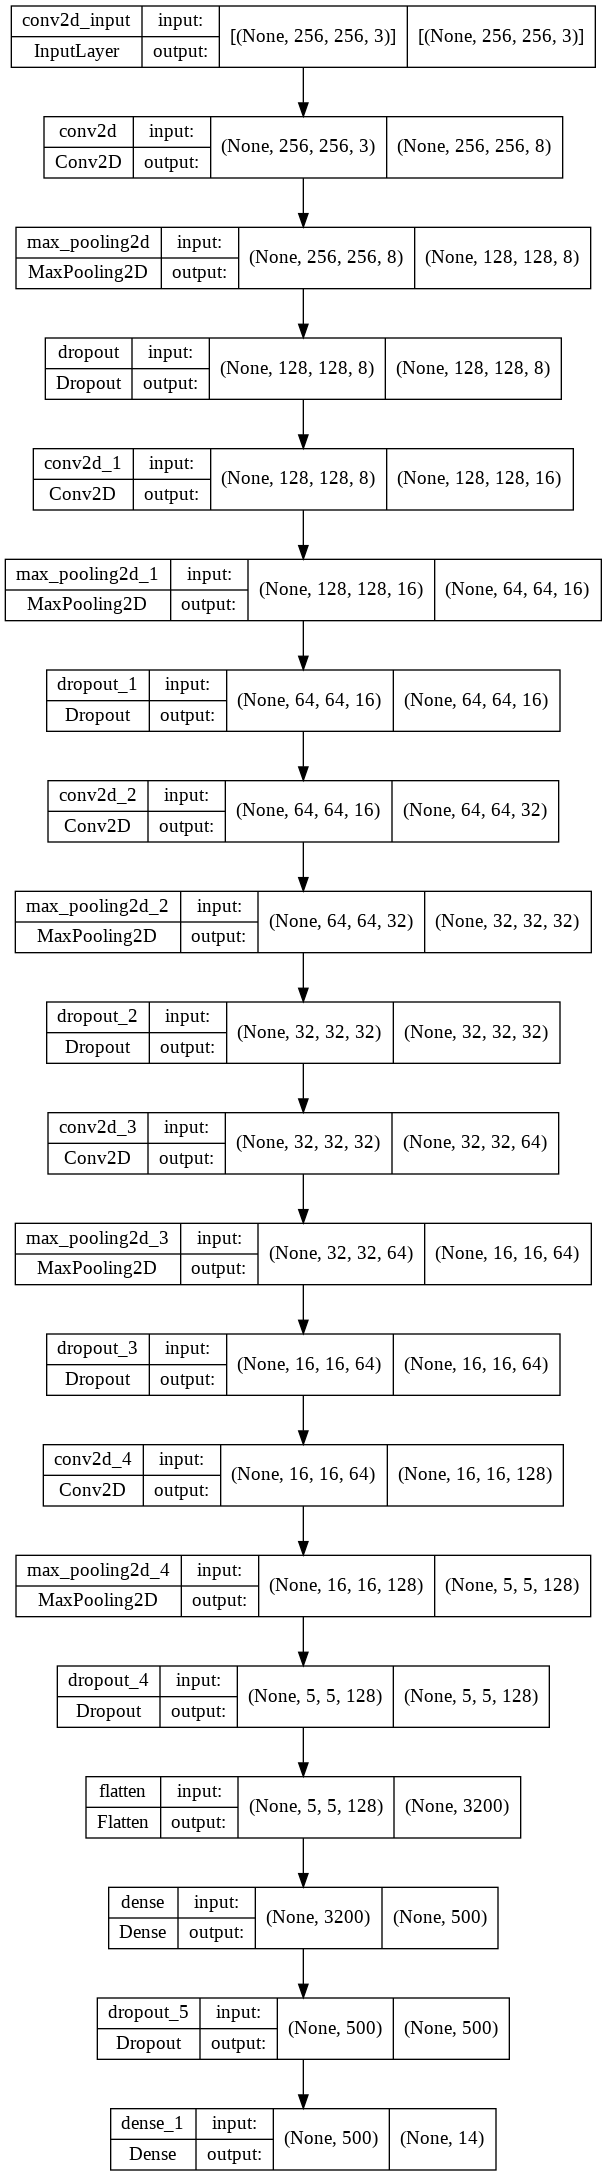

In [46]:
# visualize model
plot_model(cnn_model, show_shapes=True, to_file='/content/drive/MyDrive/CS109B_final_project/MVGG16_model_tf/cnn_model.png')

In [47]:
# define callbacks

from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('baseline_model_xray_class')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)

callbacks_list = [checkpoint, early]

In [48]:
# fit model and store training history
cnn_model_history = cnn_model.fit(train_generator, 
                     steps_per_epoch= 100,
                     validation_data = val_generator, 
                     validation_steps = 25,
                     epochs = 2, 
                     callbacks = callbacks_list)

Epoch 1/2
100/100 [==============================] - ETA: 0s - loss: 0.0644 
Epoch 1: val_loss improved from inf to 0.06922, saving model to baseline_model_xray_class_weights.best.hdf5
100/100 [==============================] - 1998s 20s/step - loss: 0.0644 - val_loss: 0.0692
Epoch 2/2
100/100 [==============================] - ETA: 0s - loss: 0.0656 
Epoch 2: val_loss did not improve from 0.06922
100/100 [==============================] - 1537s 15s/step - loss: 0.0656 - val_loss: 0.0887


In [49]:
# Save Model
cnn_model.save("/content/drive/MyDrive/CS109B_final_project/Base_model/cnn_model.h5")

In [50]:
# get predictions
y_pred = cnn_model.predict(test_generator, steps=len(test_generator), verbose=1)

349/349 [==============================] - 5270s 15s/step


In [49]:
def plot_loss(history, model_name="" ):
  fig, ax = plt.subplots(figsize = (12,6))
  x_axis_vals = np.array(range(len(history.history["val_loss"])))+1
  ax.plot(
      x_axis_vals,
      history.history["loss"],"--",label="train loss")
  ax.plot(x_axis_vals,history.history["val_loss"],"-",label="val loss",)
  ax.set_title(f"{model_name} Training Results loss Vs epochs ")
  ax.grid(':', alpha=0.4)
  ax.tick_params(labelsize=12)
  ax.legend(fontsize=12)    
  ax.set_xlabel('epoch')
  ax.set_ylabel('loss')
  #plt.suptitle(f"{model_name} Training Results")
  plt.tight_layout()
  plt.show();

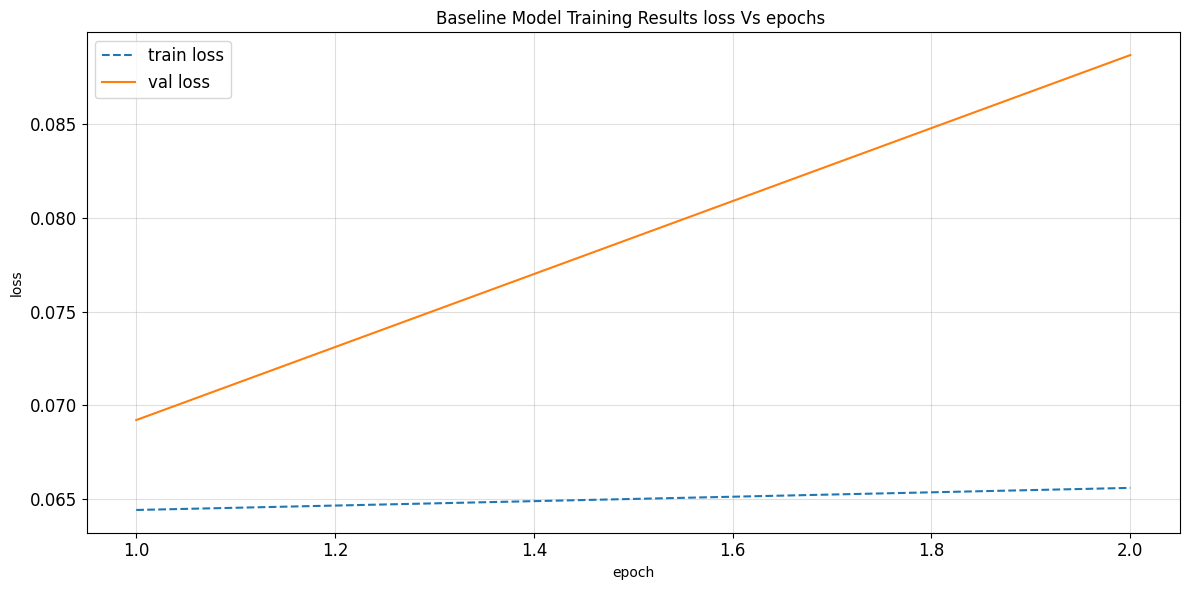

In [74]:
# Plot Model Loss
plot_loss(cnn_model_history, 'Baseline Model')

In [63]:
# function to plot ROC curves
def print_roc_curve(labels, predicted_vals, generator):
    auc_roc_vals = []
    for i in range(len(labels)):
        gt = generator.labels[:, i]
        pred = predicted_vals[:, i]
        auc_roc = roc_auc_score(gt, pred)
        auc_roc_vals.append(auc_roc)
        fpr_rf, tpr_rf, _ = roc_curve(gt, pred)
        plt.figure(1, figsize=(10, 10))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr_rf, tpr_rf,
                 label=labels[i] + " (" + str(round(auc_roc, 3)) + ")")
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC curve')
        plt.legend(loc='best')
    plt.show()
    return auc_roc_vals

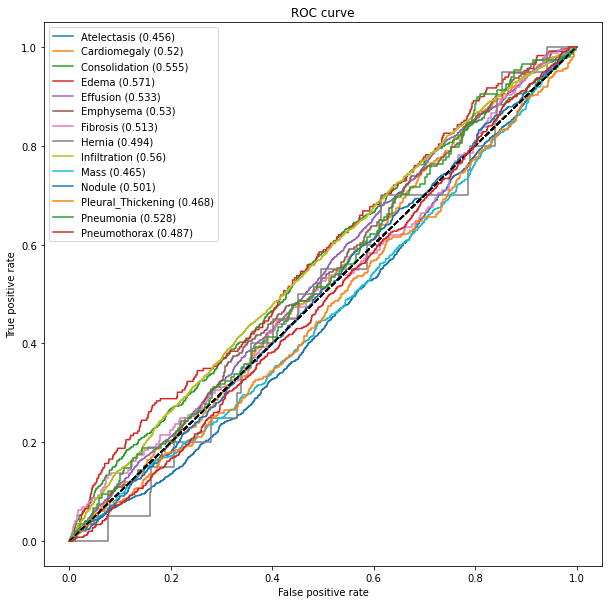

In [54]:
# Plot ROC curves
auc_dict = dict()

cnn_model_auc = print_roc_curve(desease_labels, y_pred, test_generator)
auc_dict['baseline_model'] = cnn_model_auc


Running it for couple of epochs, it give us a benchmark to compare it with our SOTA (State Of Art) models later in the notebook

## Transfer Learning: 

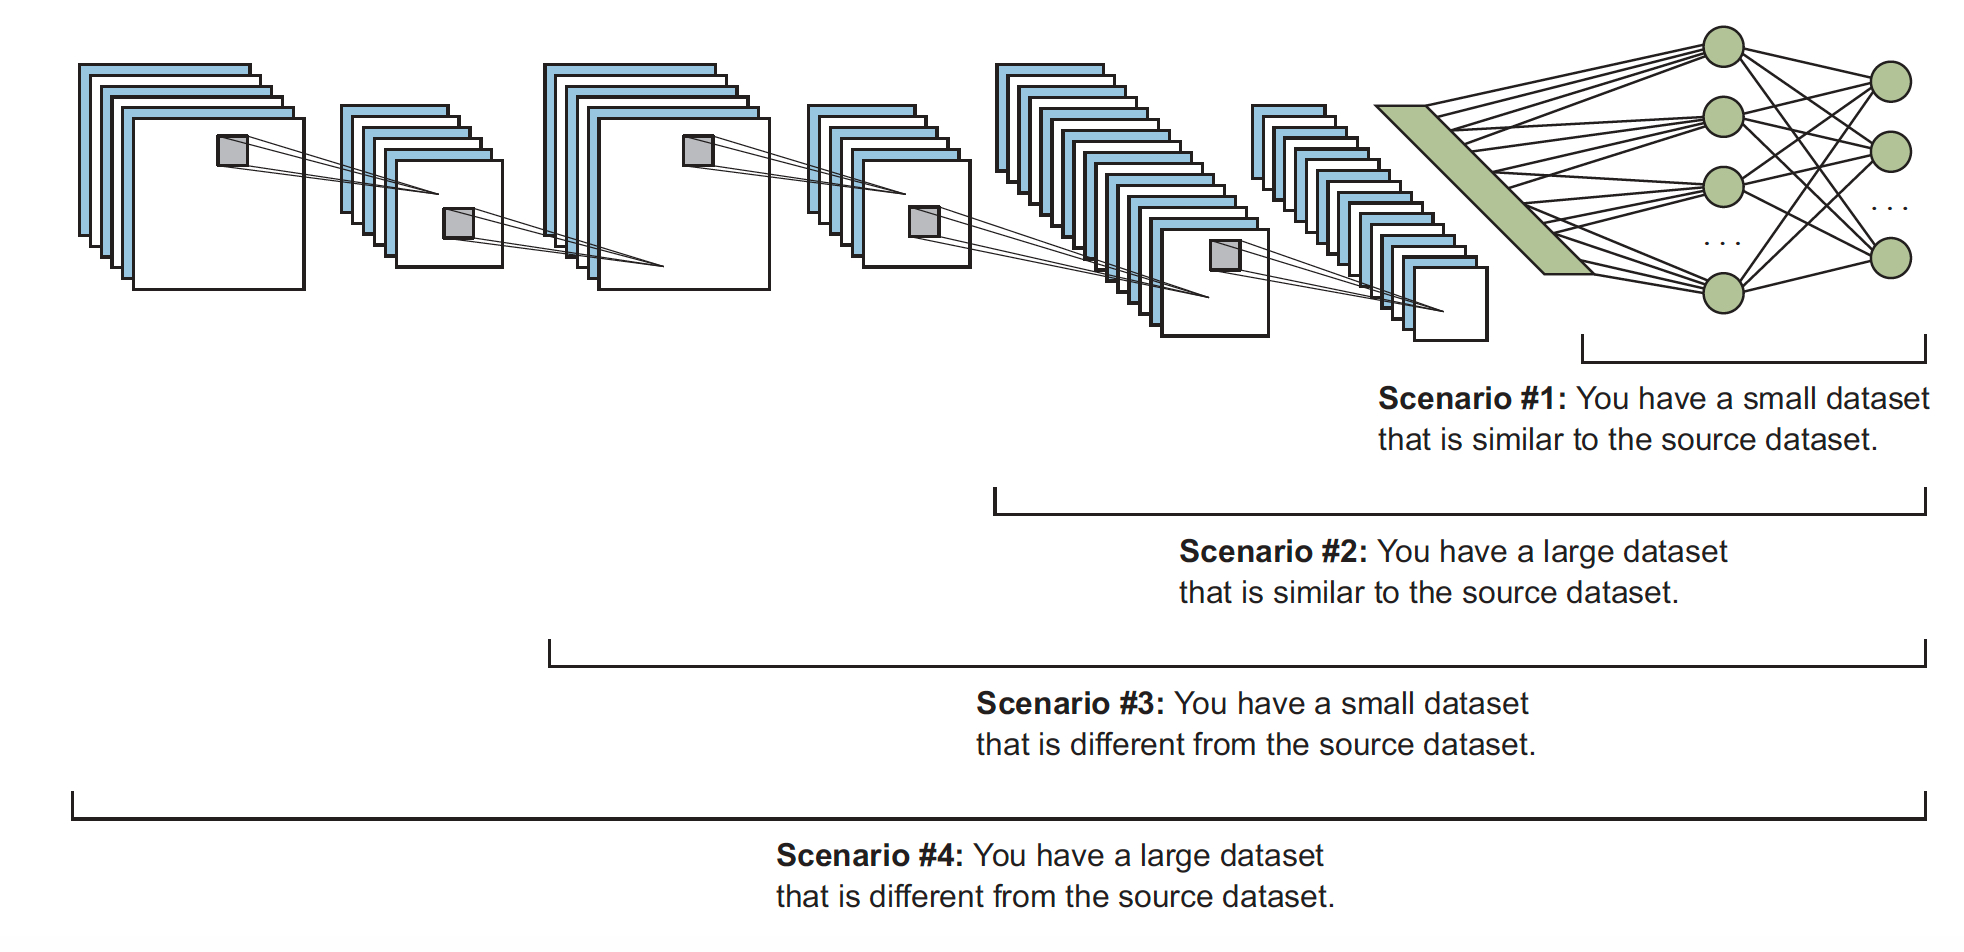

Since most of the state of art models for image classifications are trained on non-medical dataset like imagenet or COCO, the source dataset is different from the target dataset so we will follow strategy 4 as illustrated above where we will use the transfer model architecture with no freezed or pre-trained layers and having our customized classifier/top layer.   

We have decided to leverage the following models for our transfer learning task: DensetNet121, VGG16, ResNet152.

DenseNet121 was pre-initialized with weights obtained from training the model on medical images, the other two (VGG16 and ResNet152) were pretrained on generic image dataset - imagenet.

Our objective was to see if the difference in initial weights would have a material impact on overall model performance.

## Training model using **DenseNet121**

We'll now apply transfer learning and train the model using a pre-trained DenseNet121. DenseNet was introduced in 2017 in a paper by Gao Huang et al. 2018 called Densely Connected Convolutional Networks. The model was able to outperform previous architectures like ResNet.

DenseNet aims to create channels for information to flow between initial layers and final layers by creating paths between the layers of the network. Each layer in a dense block receives feature maps from all the preceding layers, and passes its output to all subsequent layers. Feature maps received from other layers are fused through concatenation. Extracted feature maps are continuously added together with previous ones.This allows the network to re-use learned information and be more efficient

 <img src="https://raw.githubusercontent.com/hardik0/AI-for-Medicine-Specialization/master/AI-for-Medical-Diagnosis/Week-1/densenet.png" alt="U-net Image" width="400" align="middle"/>

Some of the key benefits of DenseNet include:

- Addresses vanishing gradient problem 
- Stronf feature propagation and feature re-use
- Reduced trainable parameter count (DenseNet1 with 20M parameters yields similar validation error as a 101-layer ResNet with 45M parameters)


In [44]:
#Below are the training parameters we used for all the models 
############################
# Training Params
############################
#early stopping parameters
patience=5
epochs = 20
#Total number of steps (batches of samples) to yield from generator before declaring one epoch finished and starting the next epoch
steps_per_epoch=150
validation_steps=30
# Optimizer
learning_rate = 1e-5
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
#customized loss function to take care of the weights 
loss = weighted_loss


In [57]:
# define DenseNet121 Model
base_model = DenseNet121(input_shape = x.shape[1:], include_top = False, weights = '/content/drive/MyDrive/CS109B_final_project/Densenet121_weights/densenet.hdf5')
layer = base_model.output
layer = GlobalAveragePooling2D()(layer)
predictions = Dense(len(desease_labels), activation="sigmoid")(layer)

dense_net_model = Model(inputs=base_model.input, outputs=predictions)

dense_net_model.compile(optimizer = optimizer, loss = loss)
dense_net_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 128, 128, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.690719 to fit



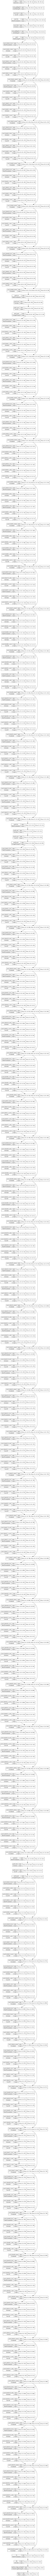

In [57]:
# visualize model
plot_model(dense_net_model, show_shapes=True, to_file='dense_net_model.png')

In [58]:
# define callbacks
weight_path="{}_weights.best.hdf5".format('dense_net_xray_class')
colab_path='/content/drive/MyDrive/CS109B_final_project/Densenet121_weights/Densenet121_weights{epoch:02d}-{val_loss:.2f}.hdf5'

checkpoint = ModelCheckpoint(colab_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss", 
                      mode="min",
                      restore_best_weights=True,
                      verbose=0, 
                      patience=patience)
callbacks_list = [checkpoint, early]

In [59]:
dense_net_history = dense_net_model.fit(train_generator, 
                     steps_per_epoch= steps_per_epoch,
                     validation_data = val_generator, 
                     validation_steps = validation_steps,
                     epochs = epochs, 
                     callbacks = callbacks_list)

Epoch 1/60
200/200 [==============================] - ETA: 0s - loss: 0.0710 
Epoch 1: val_loss improved from inf to 0.07492, saving model to /content/drive/MyDrive/CS109B_final_project/Densenet121_weights/Densenet121_weights01-0.07.hdf5
200/200 [==============================] - 3317s 17s/step - loss: 0.0710 - val_loss: 0.0749
Epoch 2/60
200/200 [==============================] - ETA: 0s - loss: 0.0645 
Epoch 2: val_loss improved from 0.07492 to 0.07017, saving model to /content/drive/MyDrive/CS109B_final_project/Densenet121_weights/Densenet121_weights02-0.07.hdf5
200/200 [==============================] - 2750s 14s/step - loss: 0.0645 - val_loss: 0.0702
Epoch 3/60
200/200 [==============================] - ETA: 0s - loss: 0.0616 
Epoch 3: val_loss did not improve from 0.07017
200/200 [==============================] - 2501s 13s/step - loss: 0.0616 - val_loss: 0.0714
Epoch 4/60
200/200 [==============================] - ETA: 0s - loss: 0.0601 
Epoch 4: val_loss improved from 0.07017 t

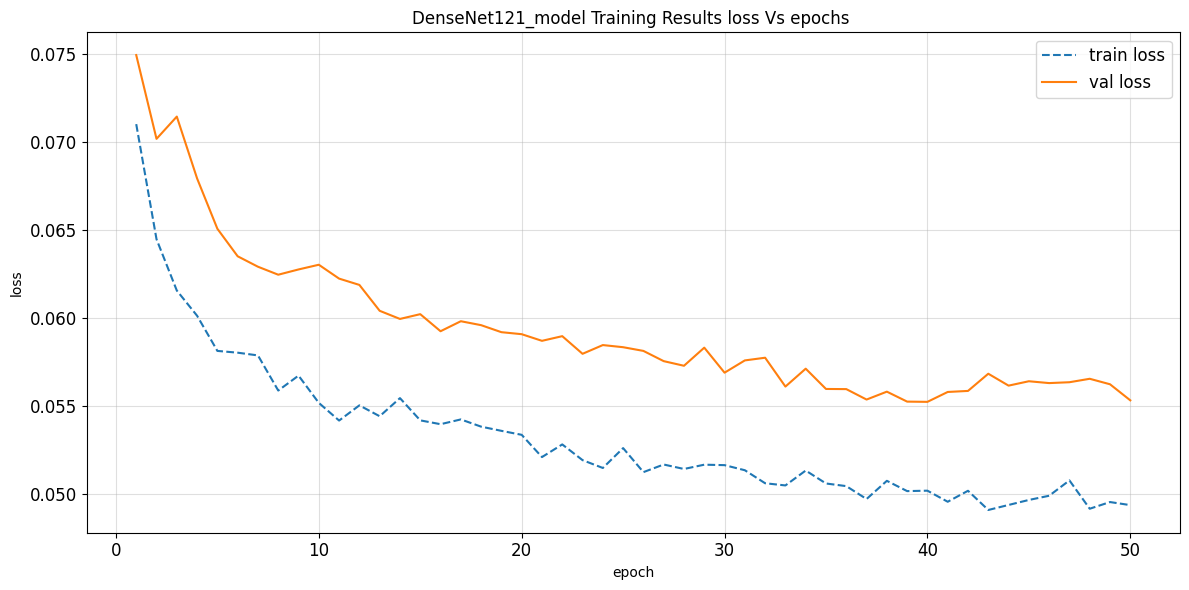

In [75]:
# Plot Loss
plot_loss(dense_net_history, 'DenseNet121_model')

In [61]:
# Save Model
dense_net_model.save("/content/drive/MyDrive/CS109B_final_project/Densenet121_weights/dense_net_model.h5")

In [62]:
# get predictions
y_pred = dense_net_model.predict(test_generator, steps=len(test_generator), verbose=1)

349/349 [==============================] - 5451s 16s/step


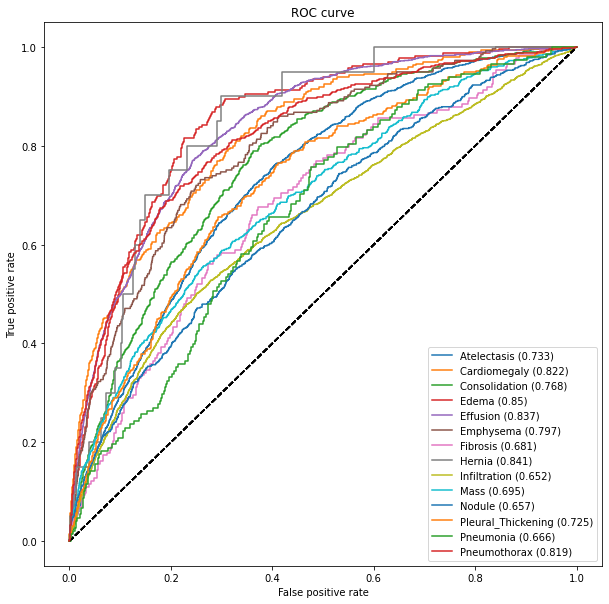

In [63]:
# Plot ROC curves
densenet_model_auc = print_roc_curve(desease_labels, y_pred, test_generator)
auc_dict['DenseNet121_model'] = densenet_model_auc

## Transfer Learning using **VGG16**

<center><img src="https://www.researchgate.net/profile/Max-Ferguson/publication/322512435/figure/fig3/AS:697390994567179@1543282378794/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only.png"></center>


In [91]:
from keras.applications import imagenet_utils
from keras.applications import vgg16

base_model = vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (256,256, 3))

In [93]:
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.models import Model

# using “get_layer” method to save the last layer of the network
# save the output of the last layer to be the input of the next layer
last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output

# flattening the classifier input which is output of the last layer of VGG16 model
x = Flatten()(last_output)

# adding FC layer, which has 64 units and relu activation 
x = Dense(64, activation='relu', name='FC_2')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
# adding our new softmax layer with len(desease_labels) hidden units
x = Dense(len(desease_labels), activation='sigmoid', name='sigmoid')(x)

# instantiating a new_model using keras’s Model class
VGG16_model = Model(inputs=base_model.input, outputs=x)

# printing the new_model summary
VGG16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [94]:
# Free up memory
tf.keras.backend.clear_session()

#compiling the model 
VGG16_model.compile(optimizer = optimizer, loss=weighted_loss, metrics=['accuracy'])

# Train model
start_time = time.time()
#setting early stopping 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weight_path="{}_weights.best.hdf5".format('dense_net_xray_class')
colab_path='/content/drive/MyDrive/CS109B_final_project/VGG16/VGG16_{epoch:02d}-{val_loss:.2f}.hdf5'

checkpoint = ModelCheckpoint(colab_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss", 
                      mode="min",
                      restore_best_weights=True,
                      verbose=0, 
                      patience=patience)
callbacks_list = [checkpoint, early]

VGG16_training_results=VGG16_model.fit(train_generator,
                        steps_per_epoch=steps_per_epoch,
                        validation_data=val_generator,
                        validation_steps=validation_steps,
                        epochs=epochs,
                        callbacks=callbacks_list,
                        )
execution_time = (time.time() - start_time)/60.0
print("Training execution time (mins)",execution_time)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.06672, saving model to /content/drive/MyDrive/CS109B_final_project/VGG16/VGG16_01-0.07.hdf5
150/150 - 888s - loss: 0.0780 - accuracy: 0.0694 - val_loss: 0.0667 - val_accuracy: 0.0240 - 888s/epoch - 6s/step
Epoch 2/20

Epoch 2: val_loss did not improve from 0.06672
150/150 - 912s - loss: 0.0728 - accuracy: 0.0721 - val_loss: 0.0671 - val_accuracy: 0.0437 - 912s/epoch - 6s/step
Epoch 3/20

Epoch 3: val_loss did not improve from 0.06672
150/150 - 905s - loss: 0.0706 - accuracy: 0.0715 - val_loss: 0.0730 - val_accuracy: 0.0385 - 905s/epoch - 6s/step
Epoch 4/20

Epoch 4: val_loss did not improve from 0.06672
150/150 - 929s - loss: 0.0690 - accuracy: 0.0815 - val_loss: 0.0768 - val_accuracy: 0.0615 - 929s/epoch - 6s/step
Epoch 5/20

Epoch 5: val_loss did not improve from 0.06672
150/150 - 918s - loss: 0.0675 - accuracy: 0.0812 - val_loss: 0.0730 - val_accuracy: 0.0396 - 918s/epoch - 6s/step
Epoch 6/20

Epoch 6: val_loss did not improve fro

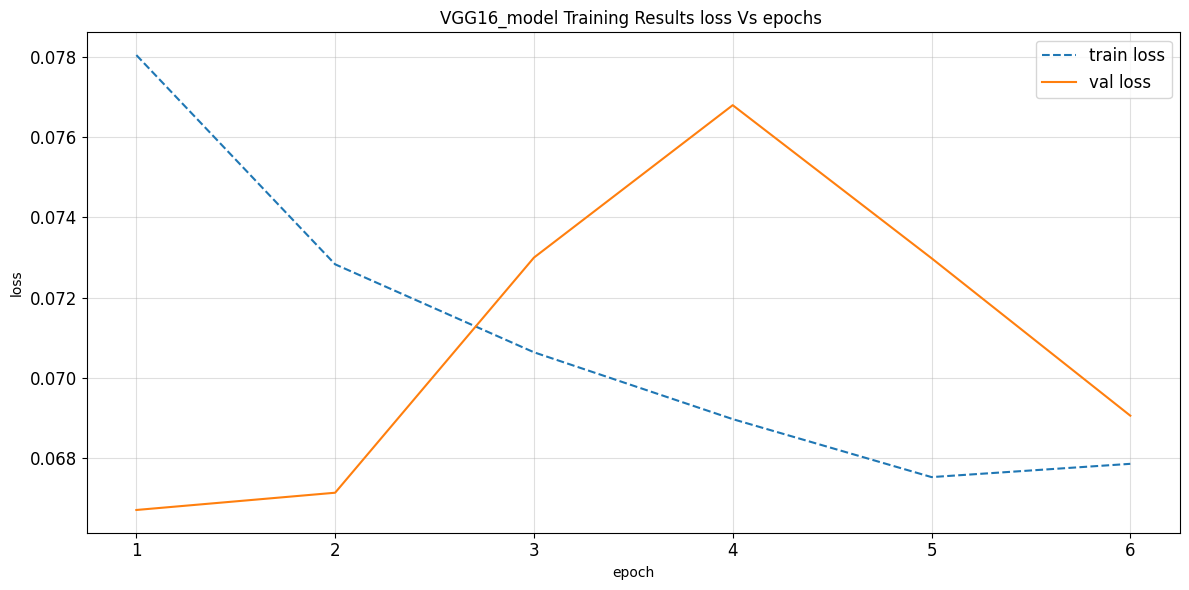

In [95]:
plot_loss(VGG16_training_results, 'VGG16_model')

In [ ]:
# Save Model
VGG16_model.save("/content/drive/MyDrive/CS109B_final_project/VGG16/VGG16_3.h5")

349/349 [==============================] - 198s 566ms/step


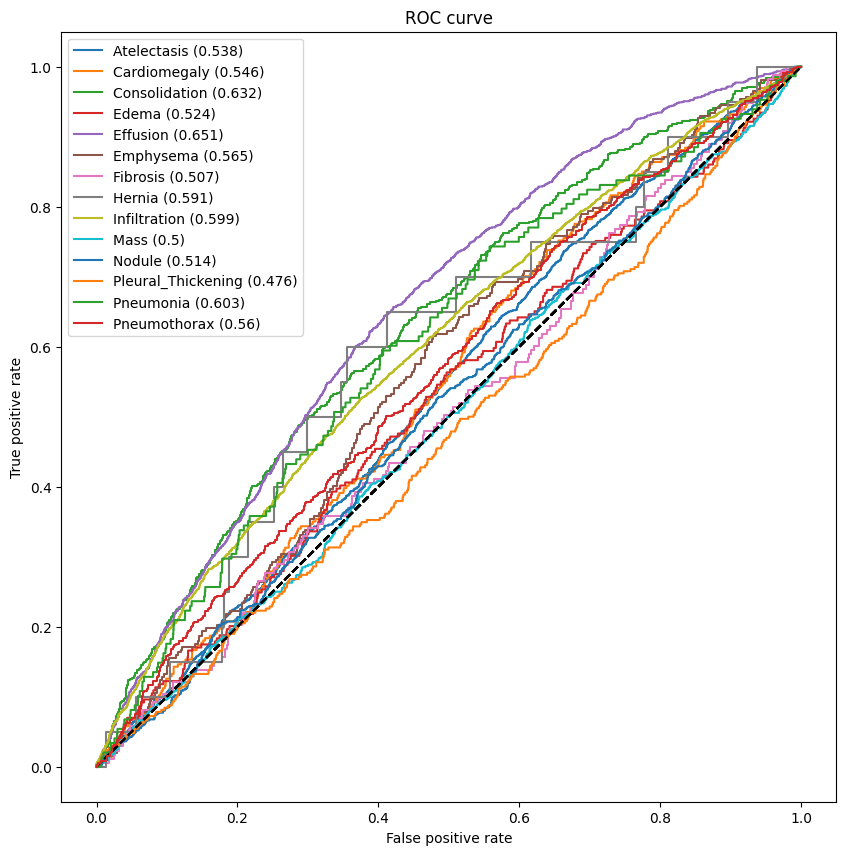

In [100]:
# get predictions
y_pred_vgg16 = VGG16_model.predict(test_generator, steps=len(test_generator), verbose=1)
# Plot ROC curves
vgg16_model_auc = print_roc_curve(desease_labels, y_pred_vgg16, test_generator)
auc_dict['VGG16_model'] = vgg16_model_auc

## Transfer learning **ResNet152**

<center><img src="https://www.mdpi.com/metals/metals-11-00549/article_deploy/html/images/metals-11-00549-g002.png"></center>

ResNet or Residucal Network is a type of neural network introduced in 2015 by Microsoft Research Asia with architechture ResNet 50, ResNet-101 and ResnNet-152. For our project we chose to train our images using Transfer Learning on ResNet-152 architecture. We selected this architecture because this has more layer as compared to other ResNet architecture, and is more deep as compared to models like VGG16. 

Deeper models are harder to train on their own, but with transfer learning we wanted esxplore and compare our results with other not so deep models. There are several advantages to using a model like ResNet-152

1. More layers allows us to learn more complex feature of the images. 
2. Training  a deep network is difficult but using ResNet which use residual blocks i.e. they skip some layers in between. 
3. The skip connection is ResNet helps with vanishing gradient problem by allowing alternate shortcut path for gradient to flow through.
4. The model is pretrained on imagenet data which is large dataset of images.

In [45]:
#from tf.keras.applications.resnet import ResNet152
ResNet152_model = tf.keras.applications.resnet.ResNet152(weights='imagenet', include_top=False, input_shape = (256,256, 3))


234708992/234698864 [==============================] - 16s 0us/step


In [46]:
ResNet152_model.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [47]:
# using “get_layer” method to save the last layer of the network
# save the output of the last layer to be the input of the next layer
last_layer = ResNet152_model.get_layer('conv5_block3_out')
last_output = last_layer.output

# flattening the classifier input which is output of the last layer of VGG16 model
x = Flatten()(last_output)

# adding FC layer, which has 64 units and relu activation 
x = Dense(512, activation='relu', name='FC_2')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
# adding our new softmax layer with len(desease_labels) hidden units
x = Dense(len(desease_labels), activation='sigmoid', name='sigmoid')(x)

# instantiating a new_model using keras’s Model class
ResNet152_model = Model(inputs=ResNet152_model.input, outputs=x)

# printing the new_model summary
ResNet152_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [48]:
# Free up memory
tf.keras.backend.clear_session()

#compiling the model 
ResNet152_model.compile(optimizer = optimizer, loss= weighted_loss, metrics=['accuracy'])

# Train model
start_time = time.time()
#setting early stopping 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weight_path="{}_weights.best.hdf5".format('dense_net_xray_class')
colab_path='/content/drive/MyDrive/CS109B_final_project/ResNet152/ResNet152_{epoch:02d}-{val_loss:.2f}.hdf5'

checkpoint = ModelCheckpoint(colab_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss", 
                      mode="min",
                      restore_best_weights=True,
                      verbose=0, 
                      patience=patience)
callbacks_list = [checkpoint, early]

ResNet152_training_results=ResNet152_model.fit(train_generator,
                        steps_per_epoch=steps_per_epoch,
                        validation_data=val_generator,
                        validation_steps=validation_steps,
                        epochs=epochs,
                        callbacks=callbacks_list
                        )
execution_time = (time.time() - start_time)/60.0
print("Training execution time (mins)",execution_time)

Epoch 1/20
150/150 [==============================] - ETA: 0s - loss: 0.0915 - accuracy: 0.0769 
Epoch 1: val_loss improved from inf to 0.08774, saving model to /content/drive/MyDrive/CS109B_final_project/ResNet152/ResNet152_01-0.09.hdf5
150/150 [==============================] - 2978s 20s/step - loss: 0.0915 - accuracy: 0.0769 - val_loss: 0.0877 - val_accuracy: 0.1000
Epoch 2/20
150/150 [==============================] - ETA: 0s - loss: 0.0835 - accuracy: 0.0802 
Epoch 2: val_loss improved from 0.08774 to 0.08502, saving model to /content/drive/MyDrive/CS109B_final_project/ResNet152/ResNet152_02-0.09.hdf5
150/150 [==============================] - 2284s 15s/step - loss: 0.0835 - accuracy: 0.0802 - val_loss: 0.0850 - val_accuracy: 0.0406
Epoch 3/20
150/150 [==============================] - ETA: 0s - loss: 0.0820 - accuracy: 0.0875 
Epoch 3: val_loss improved from 0.08502 to 0.08320, saving model to /content/drive/MyDrive/CS109B_final_project/ResNet152/ResNet152_03-0.08.hdf5
150/150 [=

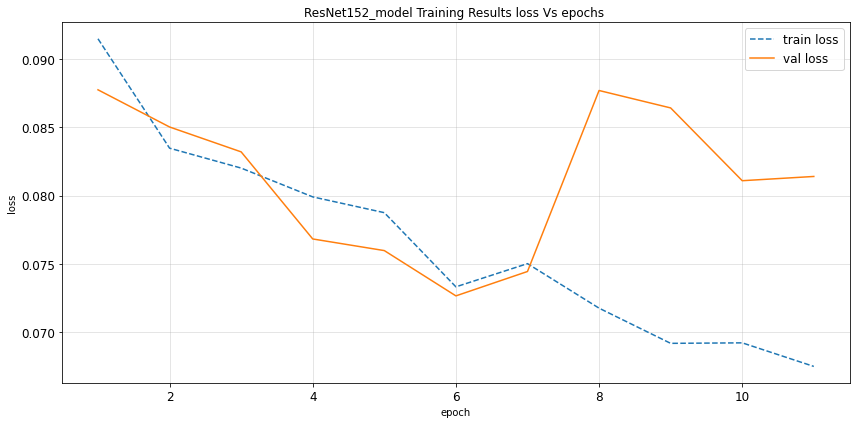

In [50]:
plot_loss(ResNet152_training_results, 'ResNet152_model')


In [ ]:
# Save Model
ResNet152_model.save("/content/drive/MyDrive/CS109B_final_project/ResNet152/ResNet152_v2.h5")
# get predictions
y_pred_resnet152 = ResNet152_model.predict(test_generator, steps=len(test_generator), verbose=1)
# Plot ROC curves
resnet152_model_auc = print_roc_curve(desease_labels, y_pred_resnet152, test_generator)

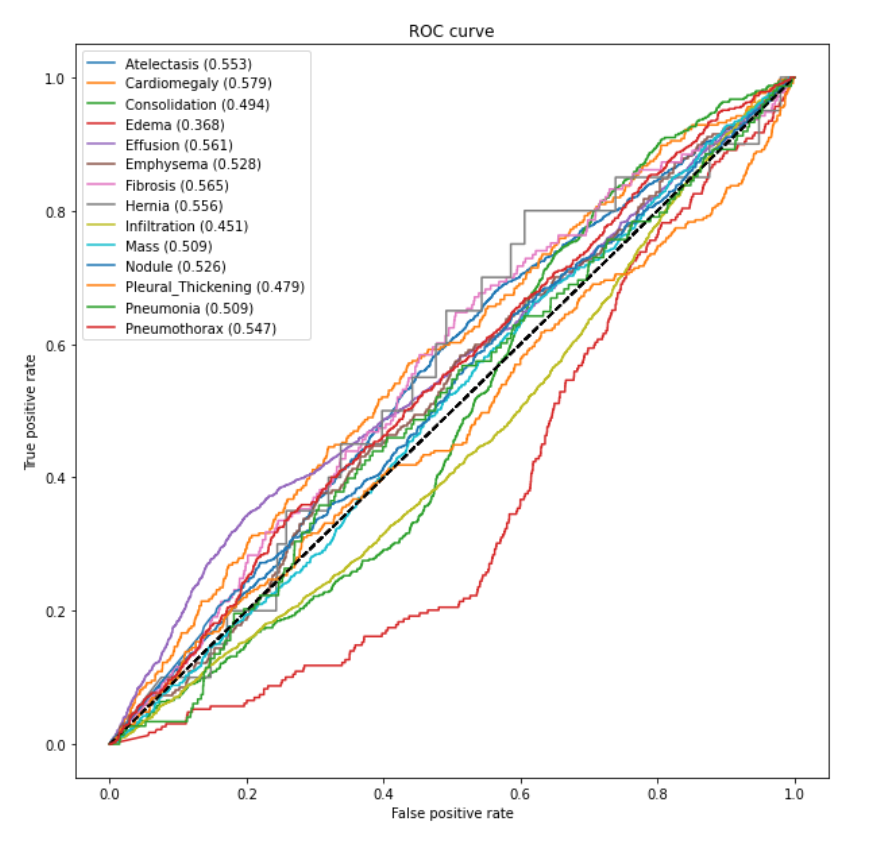

# Choosing and Using the best Model and Making Predictions
After comparing the AUC scores and ROC curves of the 4 models,DenseNet121 yielded the best performance.Therfore we will be using this model to make prediction on the test set. 

With the model trained we will now use it to help identify possible pathologies in an X-Ray image. We will use the model to predict the top 3 pathologies most likely to be present in the X-Ray images (using predicted probabilities) and then apply GradCam visualization to understand what ares of the image the model deemed as most important when making its predictions.

First, we will retrieve a sample image from the dataset and standardize/normalize it so we can feed it into the model

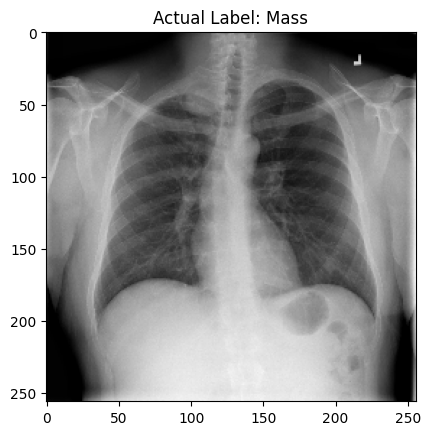

In [95]:
sns.reset_defaults()

# function to standardize an image
def get_mean_std_per_batch(df, H=256, W=256):
    sample_data = []
    for idx, img in enumerate(df.sample(100)["Image Path"].values):
        path = img
        sample_data.append(np.array(image.load_img(path, target_size=(H, W))))

    mean = np.mean(sample_data[0])
    std = np.std(sample_data[0])
    return mean, std    

# function to normalize an image
def load_image_normalize(path, mean, std, H=256, W=256):
    x = image.load_img(path, target_size=(H, W))
    x -= mean
    x /= std
    x = np.expand_dims(x, axis=0)
    return x

# function to load and preprocess an image
def load_image(path, df, preprocess=True, H = 256, W = 256):
    
    x = image.load_img(path, target_size=(H, W))
    if preprocess:
        mean, std = get_mean_std_per_batch(df, H=H, W=W)
        x -= mean
        x /= std
        x = np.expand_dims(x, axis=0)
    return x

im_path = '/content/drive/MyDrive/CS109B_final_project/data_2/images_009/images/00019233_000.png' 
x = load_image(im_path, xrays_df_train, preprocess=False)
actual_label = xrays_df['Finding Labels'][xrays_df['Image Path']==im_path].iloc[0]
plt.imshow(x, cmap = 'gray')
plt.title("Actual Label: " + str(actual_label))
plt.show()

### Getting Predictions

We can see that we got a chest X-Ray image where Mass was detected to be present as a pathology.
We will now feed the standardized image into the best model (DensNet) to get predictions and see if our model can correctly identify Mass in the X-ray and highlight the correct section in Gradcam heat map.

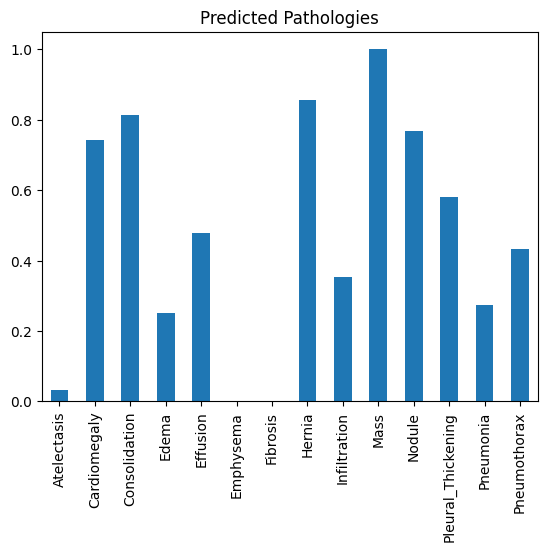

In [96]:
mean, std = get_mean_std_per_batch(xrays_df_train)

processed_image = load_image_normalize(im_path, mean, std)
preds = dense_net_model.predict(processed_image)
preds=(preds - np.min(preds)) / (np.max(preds) - np.min(preds))
pred_df = pd.DataFrame(preds, columns = desease_labels)
pred_df.loc[0, :].plot.bar()
plt.title("Predicted Pathologies")
plt.savefig('predictions.png')
plt.show()

In [97]:
pred_df = pred_df.sort_values(by=0, axis=1, ascending=0)
pred_df

Mass    Hernia  Consolidation    Nodule  Cardiomegaly  Pleural_Thickening  \
0   1.0  0.855829       0.814223  0.769131      0.743678            0.581591   

   Effusion  Pneumothorax  Infiltration  Pneumonia     Edema  Atelectasis  \
0  0.479633        0.4335      0.352215    0.27433  0.250989     0.031551   

   Emphysema  Fibrosis  
0   0.001869       0.0

In [98]:
# highest probability predictions
top3_predictions = pred_df.iloc[:,:3]
print("Pathologies with highest probability of occuring: \n ", top3_predictions)

Pathologies with highest probability of occuring: 
     Mass    Hernia  Consolidation
0   1.0  0.855829       0.814223


Looks like the model predicted with very high certainty that Mass is present in the X-ray with perfect 1.0 probability.

The model also predicted that Hernia and Consolidation are likely present in the X-ray with 0.81-0.856 probability.

---


Now let's apply a GradCam heatmap to see which areas of the image informed model's predictive decisions.

In [99]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

Predicted:    Mass    Hernia  Consolidation
0   1.0  0.855829       0.814223


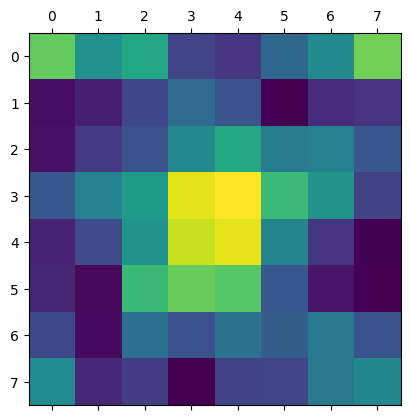

In [100]:
# Remove last layer's sigmoid
dense_net_model.layers[-1].activation = None

# Print what the top predicted class is
print("Predicted:", top3_predictions)


# Get image
im = load_image_normalize(im_path, mean, std)

# Generate class activation heatmap
#heatmap = make_gradcam_heatmap(im, vgg16, 'block5_pool')
heatmap = make_gradcam_heatmap(im, dense_net_model, 'conv5_block16_concat')
# Display heatmap
plt.matshow(heatmap)
plt.show()

Actual Label:  Mass
Predicted Labels: 
     Mass    Hernia  Consolidation
0   1.0  0.855829       0.814223


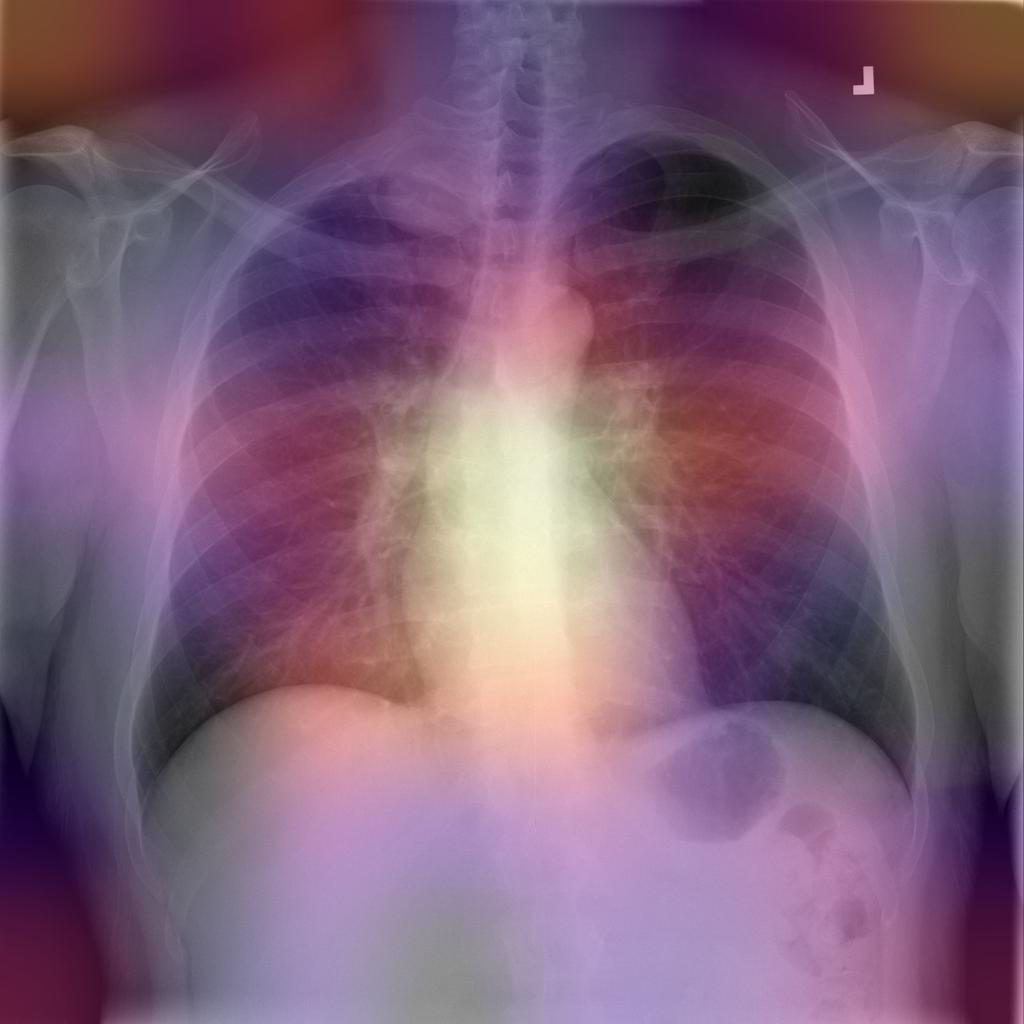

In [102]:
def save_and_display_gradcam(img_path, label, actual_label, heatmap, cam_path="cam.jpg", alpha=0.75):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    print("Actual Label: ", actual_label)
    print("Predicted Labels: \n ", label)
    display(Image(cam_path))
    
save_and_display_gradcam(im_path, top3_predictions, actual_label, heatmap)

It appears that our model correctly identified the area of the image that led to the detection of Mass. 

## Closer Examination of Best Performing Model

Let's now take a closer look at the various metrics, namely True Positives, True Negatives, False Positives, False Negatives, Sensitivity, Specificity, Prevalence, F1 score, Positive Predictive Values, Negative Predictive Values, of our best-performing model and evaluate how it compares with Radiologists and a benchmark model (can be found in references).

In [64]:
from sklearn.metrics import roc_auc_score,f1_score

def get_true_pos(y, pred, th=0.5):
    pred_t = (pred > th)
    return np.sum((pred_t == True) & (y == 1))

def get_true_neg(y, pred, th=0.5):
    pred_t = (pred > th)
    return np.sum((pred_t == False) & (y == 0))

def get_false_neg(y, pred, th=0.5):
    pred_t = (pred > th)
    return np.sum((pred_t == False) & (y == 1))

def get_false_pos(y, pred, th=0.5):
    pred_t = (pred > th)
    return np.sum((pred_t == True) & (y == 0))

def get_prevalence(y):
    prevalence = 0.0
    prevalence = np.mean(y)
    return prevalence

def get_sensitivity(y, pred, th=0.5):
    TP = get_true_pos(y,pred, th)
    FN = get_false_neg(y, pred, th)
    sensitivity = TP / (TP + FN)
    return sensitivity

def get_specificity(y, pred, th=0.5):
    specificity = 0.0
    TN = get_true_neg(y,pred, th)
    FP = get_false_pos(y, pred, th)
    specificity = TN / (TN + FP) 
    return specificity

def get_ppv(y, pred, th=0.5):
    PPV = 0.0
    TP = get_true_pos(y,pred,th)
    FP = get_false_pos(y,pred,th)
    PPV = TP / (TP + FP)
    return PPV

def get_npv(y, pred, th=0.5):
    NPV = 0.0
    TN = get_true_neg(y,pred,th)
    FN = get_false_neg(y,pred,th)
    NPV = TN / (TN + FN)
    return NPV

In [67]:
def display_metrics(y, pred, class_labels, tp=get_true_pos,
                            tn=get_true_neg, fp=get_false_pos,
                            fn=get_false_neg,prevalence=None, spec=None,
                            sens=None, ppv=None, npv=None, auc=None, f1=None,
                            thresholds=[]):
    if len(thresholds) != len(class_labels):
        thresholds = [.5] * len(class_labels)

    columns = ["", "TP", "TN", "FP", "FN", "Prevalence","Sensitivity",
               "Specificity", "PPV", "NPV", "F1", "AUC", 'Radiologists AUC','AUC diff w/ Radiologists', 'Benchmark AUC']
    
    radiologists_auc = [0.808, 0.888,0.841,0.910,0.900,0.911,0.897,0.985,0.734,0.886,0.899,0.779,0.823,0.940]
    benchmark_auc = [0.862,0.831,0.893,0.924,0.901,0.704,0.806,0.851,0.721,0.909,0.894,0.798,0.851,0.944]
    
    df = pd.DataFrame(columns=columns)
    for i in range(len(class_labels)):
        df.loc[i] = [""] + [0] * (len(columns) - 1)
        df.loc[i][0] = class_labels[i]
        df.loc[i][1] = round(tp(y[:, i], pred[:, i]),3) 
        df.loc[i][2] = round(tn(y[:, i], pred[:, i]),3) 
        df.loc[i][3] = round(fp(y[:, i], pred[:, i]),3) 
        df.loc[i][4] = round(fn(y[:, i], pred[:, i]),3) 
        df.loc[i][5] = round(prevalence(y[:, i]),3) 
        df.loc[i][6] = round(sens(y[:, i], pred[:, i], thresholds[i]),3) 
        df.loc[i][7] = round(spec(y[:, i], pred[:, i], thresholds[i]),3) 
        df.loc[i][8] = round(ppv(y[:, i], pred[:, i], thresholds[i]),3) 
        df.loc[i][9] = round(npv(y[:, i], pred[:, i], thresholds[i]),3) 
        df.loc[i][11] = round(auc(y[:, i], pred[:, i]),3) 
        df.loc[i][10] = round(f1(y[:, i], pred[:, i] > thresholds[i]),3) 
        df.loc[i][12] = radiologists_auc[i]
        df.loc[i][13] = (round(auc(y[:, i], pred[:, i]),3)) - radiologists_auc[i]
        df.loc[i][14] = benchmark_auc[i]

    df = df.set_index("")
    return df

In [68]:
# display performance metrics
display_metrics(test_generator.labels, y_pred_dense_net, desease_labels, prevalence=get_prevalence, sens=get_sensitivity, spec=get_specificity, ppv=get_ppv, npv=get_npv, auc=roc_auc_score,f1=f1_score)

TP    TN    FP   FN Prevalence Sensitivity Specificity  \
                                                                               
Atelectasis          492  8262  1775  618        0.1       0.443       0.823   
Cardiomegaly         256  6566  4287   38      0.026       0.871       0.605   
Consolidation        400  6236  4424   87      0.044       0.821       0.585   
Edema                159  8983  1935   70      0.021       0.694       0.823   
Effusion             839  8059  1850  399      0.111       0.678       0.813   
Emphysema            121  9591  1299  136      0.023       0.471       0.881   
Fibrosis              49  9757  1217  124      0.016       0.283       0.889   
Hernia                14  9212  1915    6      0.002         0.7       0.828   
Infiltration        1153  6091  3028  875      0.182       0.569       0.668   
Mass                 402  5424  5179  142      0.049       0.739       0.512   
Nodule               471  4943  5568  165      0.057       0.741        0.47   
Pleural_Thickening   271  5524  5291   61       0.03       0.816       0.511   
Pneumonia             52  8615  2384   96      0.013       0.351       0.783   
Pneumothorax         322  8894  1746  185      0.045       0.635       0.836   

                      PPV    NPV     F1    AUC Radiologists AUC  \
                                                                  
Atelectasis         0.217   0.93  0.291  0.732            0.808   
Cardiomegaly        0.056  0.994  0.106  0.822            0.888   
Consolidation       0.083  0.986  0.151  0.767            0.841   
Edema               0.076  0.992  0.137  0.849             0.91   
Effusion            0.312  0.953  0.427  0.836              0.9   
Emphysema           0.085  0.986  0.144  0.795            0.911   
Fibrosis            0.039  0.987  0.068  0.681            0.897   
Hernia              0.007  0.999  0.014  0.837            0.985   
Infiltration        0.276  0.874  0.371  0.651            0.734   
Mass                0.072  0.974  0.131  0.693            0.886   
Nodule              0.078  0.968  0.141  0.656            0.899   
Pleural_Thickening  0.049  0.989  0.092  0.724            0.779   
Pneumonia           0.021  0.989   0.04  0.665            0.823   
Pneumothorax        0.156   0.98   0.25  0.818             0.94   

                   AUC diff w/ Radiologists Benchmark AUC  
                                                           
Atelectasis                          -0.076         0.862  
Cardiomegaly                         -0.066         0.831  
Consolidation                        -0.074         0.893  
Edema                                -0.061         0.924  
Effusion                             -0.064         0.901  
Emphysema                            -0.116         0.704  
Fibrosis                             -0.216         0.806  
Hernia                               -0.148         0.851  
Infiltration                         -0.083         0.721  
Mass                                 -0.193         0.909  
Nodule                               -0.243         0.894  
Pleural_Thickening                   -0.055         0.798  
Pneumonia                            -0.158         0.851  
Pneumothorax                         -0.122         0.944

# Findings, Model Limitations and Conclusion
When comparing our model's results, specifically AUC score, we can see that on average it performed worse than both Radiologists and the Benchmark model (both of these can be found in reference section)

Our model was able to achieve better AUC score than the benchmark model for detecting Emphysema, achieving an AUC score of 0.795 vs. 0.704 of the Benchmark model.

AUC score for hernia of our model was on par with that of benchmark model (0.837 vs 0.851 respectively)

Where our model seemed to struggle the most was with detecting Fibrosis, falling short of Radiologists' AUC by -0.216

The reason we believe our model fell short performance-wise when compared to both Radiologists' AUC and benchmark model AUC was relative lack of total training time, limited model fine-tuning, and limited image preprocessing.

To improve on our model in the future, our plan is to introduce more training samples for pathologies that our model underperformed on, as well as consider additional fine-tuning of the model by freezing certain layers.




During the project we got an opportunity to work with several state of the art convolutional neural networks, like DenseNet, VGG16, and ResNet applying transfer learning modeling techniques to predict presence of 14 different pathologies in chest X-Ray Images.

In the end our DenseNet121 model ended up performing the best in terms of achieving the highest AUC scores for the 14 different pathologies in a test data set. This model was then used to predict presence of a pathology(s) in a never-before-seen image.

Additionally, we leveraged GradCam heatmap visualization to highlight areas of the image that the model deemed important in making its predictive decisions, which can be used as an assistive aid to radiologists examining the images.

# Project challenges

One of the major challenges with this project was working with very large dataset. We considered two different approaching with dealing with his challenge, specifically through using TF Record and ImageDataGenerators.

While TF Records did allow us to reduce the dataset size to ~3GB, due to the exteremly long TF Records creation times we couldn't iterate on making changes to our pre-processing pipeline in reasonable time. In the end, we settled on using ImageDataGenerators primarily for that reason.

We also looked at many other Covnet model architectures and experimented with transfer layer using variety of custom layers. 
One example is the use of EfficientNetB0 architecture. We experiemented with different custom layers, for example use the EfficientNetB0 last layer for training with our top layer. We also experimented with training with the last two layers unfrozen and so on. However, with EfficientNetB0 the challlenge was that every epoch took a long time with a batch size of 32 and 64. One epoch using google collab pro with batch size 32 took > 30 minutes. We as a team decided not to include this model, as we could not fit the training in our schedule with other models.

Another major challenge was model training time. Even when using Goolge Collab Pro+ compute environment our models took ~30 minutes per epoch to train sometimes resulting in our models taking over 1 day to complete training.

# References
Medical AI in Radiology: Chest X-Ray Interpretation

Pranav Rajpurkar PhD, Feiyang (Kathy) Yu

https://edstem.org/us/courses/17022/lessons/33473/slides/190771

NIH Chest X-Ray dataset https://cloud.google.com/healthcare-api/docs/resources/public-datasets/nih-chest

Densely Connected Convolutional Networks https://arxiv.org/abs/1608.06993

Deep Residual Learning for Image Recognition https://arxiv.org/abs/1512.03385

Mohamed Elgendy , Deep Learning for Vision Systems. Transfer Learning Page240-282

Lung Hernia : radiographic features. https://www.ajronline.org/doi/10.2214/ajr.154.1.2104725

Pneumothorax: https://radiopaedia.org/articles/pneumothorax?lang=us

Coursera's Medical AI course:https://www.coursera.org/specializations/ai-for-medicine

chest X-ray model benchmark: https://camo.githubusercontent.com/7abed0d9943b5723c0cffb5bb4f92b9d825310e916da1569a8779606cbe537aa/68747470733a2f2f6a6f75726e616c732e706c6f732e6f72672f706c6f736d65646963696e652f61727469636c652f6669677572652f696d6167653f73697a653d6c617267652669643d31302e313337312f6a6f75726e616c2e706d65642e313030323638362e74303031